---: Downloading VIX Data ---
Basic cleaning complete. Row count: 4039

GRAPH EXPLANATION 1: VIX Historical Close Price
This chart displays the raw historical daily closing prices of the VIX index from 2010 to the present.
It provides a high-level overview of market volatility trends, showing clearly periods of relative calm
versus periods of extreme market stress (peaks).


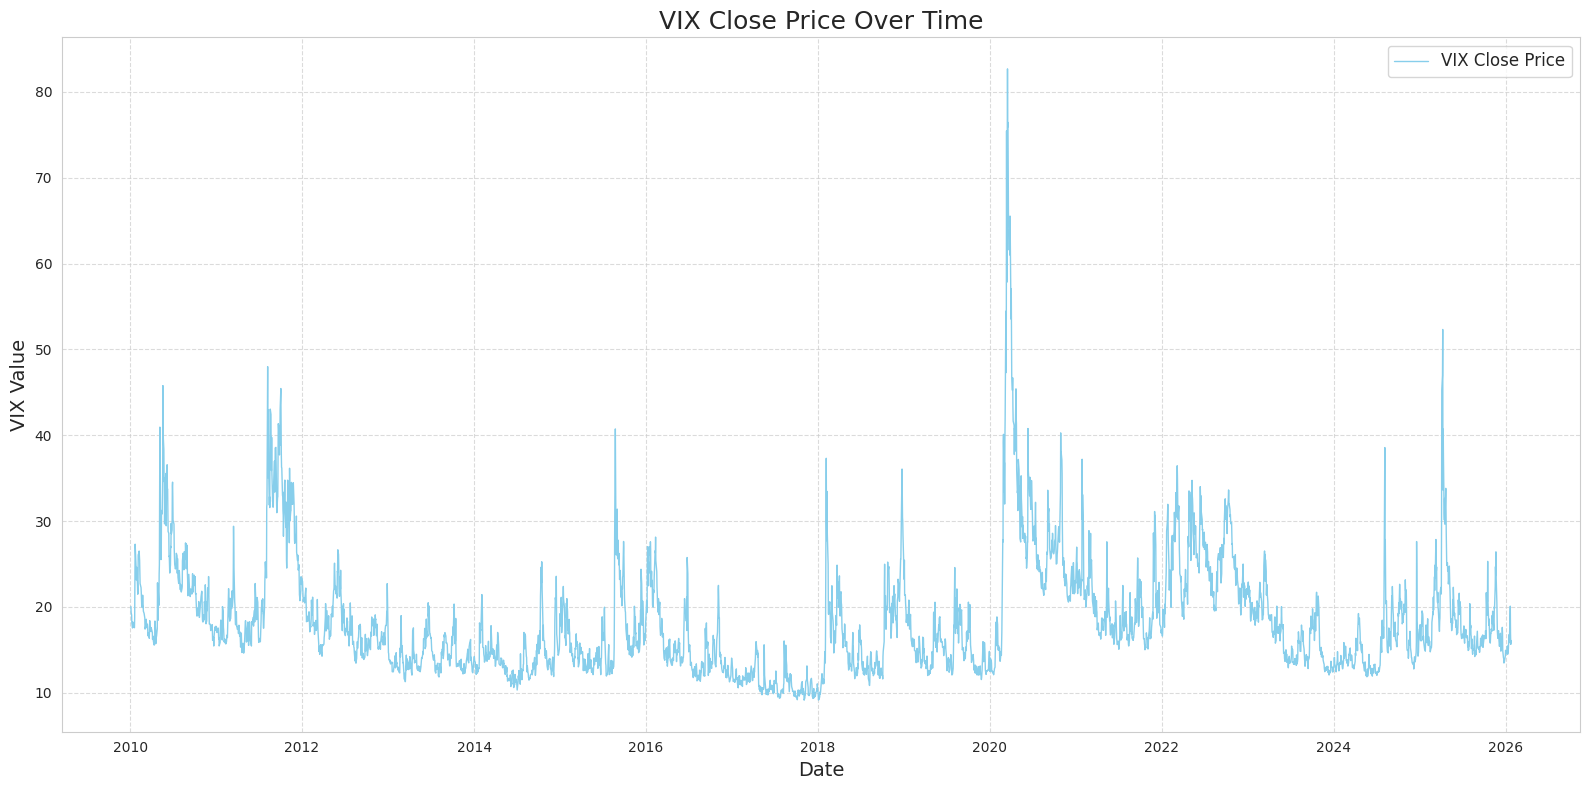

[*********************100%***********************]  2 of 2 completed

Mean VIX Close: 18.40
Std Dev VIX Close: 6.86

--- : Feature Engineering ---

---  Sentiment & Outlier Detection ---
Total rows analyzed: 4039
Outliers detected: 59
Sample outliers:
Price           Close Volatility_Status
Date                                   
2010-05-07  40.950001      Extreme Fear
2010-05-20  45.790001      Extreme Fear
2010-05-21  40.099998      Extreme Fear
2011-08-08  48.000000      Extreme Fear
2011-08-10  42.990002      Extreme Fear

--- Visualizations ---
Generating Mirror Effect Plot...

GRAPH EXPLANATION 2: The Mirror Effect (Inverse Correlation)
This dual-axis chart compares the S&P 500 index (Blue, Left Axis) with the VIX (Red, Right Axis).
It visually demonstrates the strong inverse correlation: typically, when the S&P 500 drops (market decline),
the VIX spikes (fear increases), and vice versa.


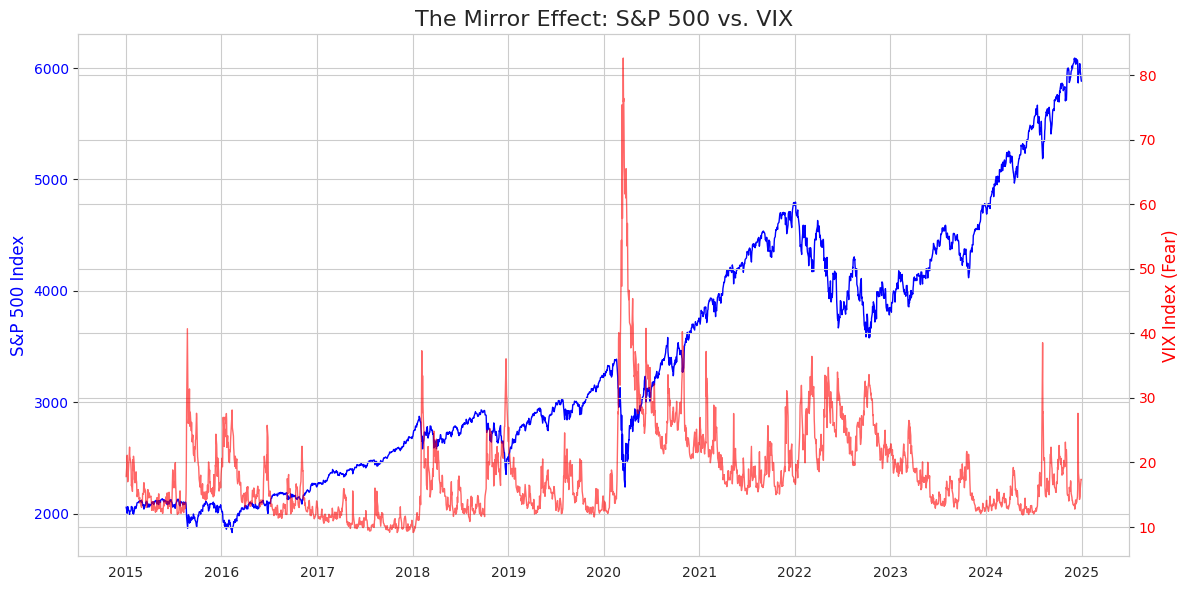

Generating Market Events Plot...

GRAPH EXPLANATION 3: Annotated Major Market Events
This chart zooms in on the last 5 years (2020-2025) and annotates specific global events.
The goal is to provide context to the data, linking statistical spikes in volatility to real-world
crises such as COVID-19, geopolitical conflicts, and economic policy changes.


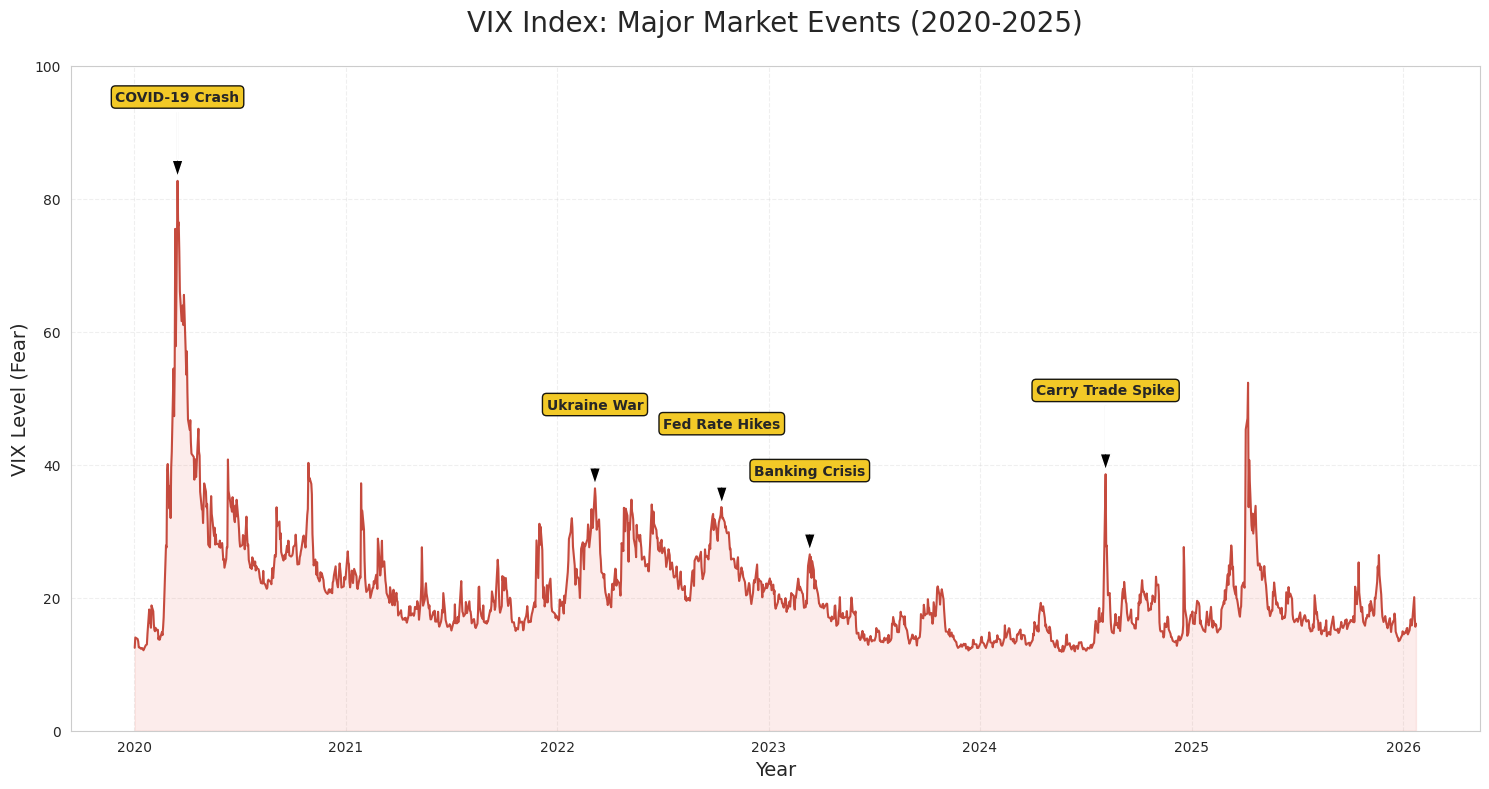

Generating Boxplot...
Median VIX Price: 16.65
75% of the time, VIX is below: 21.09
Extreme Event Threshold (Statistical): 32.06

GRAPH EXPLANATION 4: Boxplot Distribution Analysis
This Boxplot visualizes the statistical distribution of VIX closing prices.
It helps identify the median value, the interquartile range (where 50% of the data lies),
and explicitly highlights 'outliers' - values that are statistically extreme (dots on the right).
In the graph above, the samples within the 25% to 75% range can be seen inside the orange box.
 Additionally, extreme values above a CLOSE value of 31.97 have been classified and can be seen as outliers [חריגים] on the right side of the graph.
From a manual check we conducted in search engines, we discovered that the lowest value of the Fear Index ever recorded was 9.14 in 2017,
 which explains the absence of outliers on the left side of the graph.


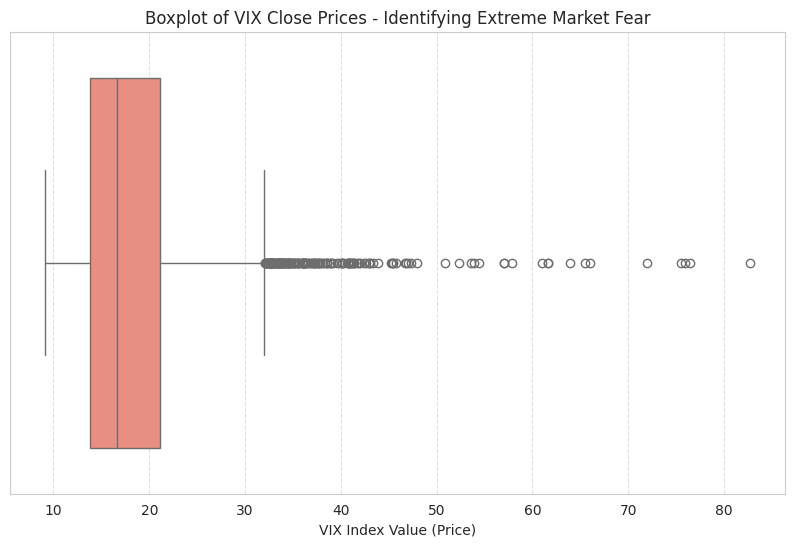

Generating Distribution of Returns Plot...

GRAPH EXPLANATION 5: Distribution of Daily Returns (Histogram)
This histogram shows the frequency of daily percentage changes in the VIX.
The vertical lines mark key statistics: the mean return (Red) and standard deviations (Green).
The Purple line marks the 5% downside risk. This confirms if the data follows a normal distribution or has 'fat tails'.


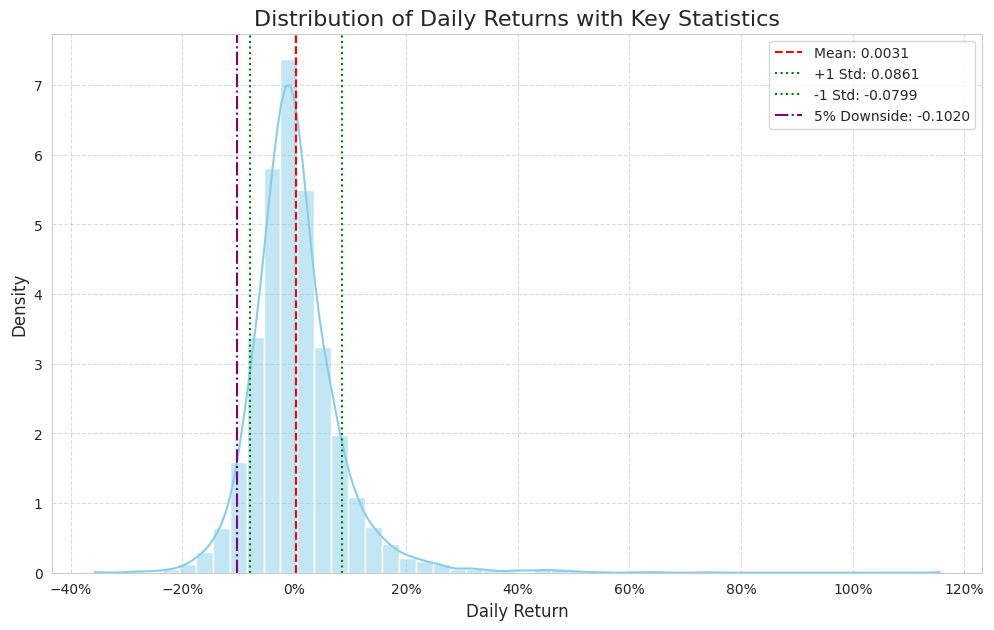

Generating Moving Averages Plot...

GRAPH EXPLANATION 6: Trend Analysis with Moving Averages
This plot overlays the 20-day (Orange) and 50-day (Green) Moving Averages on the VIX price.
Moving averages smooth out short-term fluctuations to reveal the underlying trend.
Crossovers between short-term and long-term averages can signal momentum shifts.


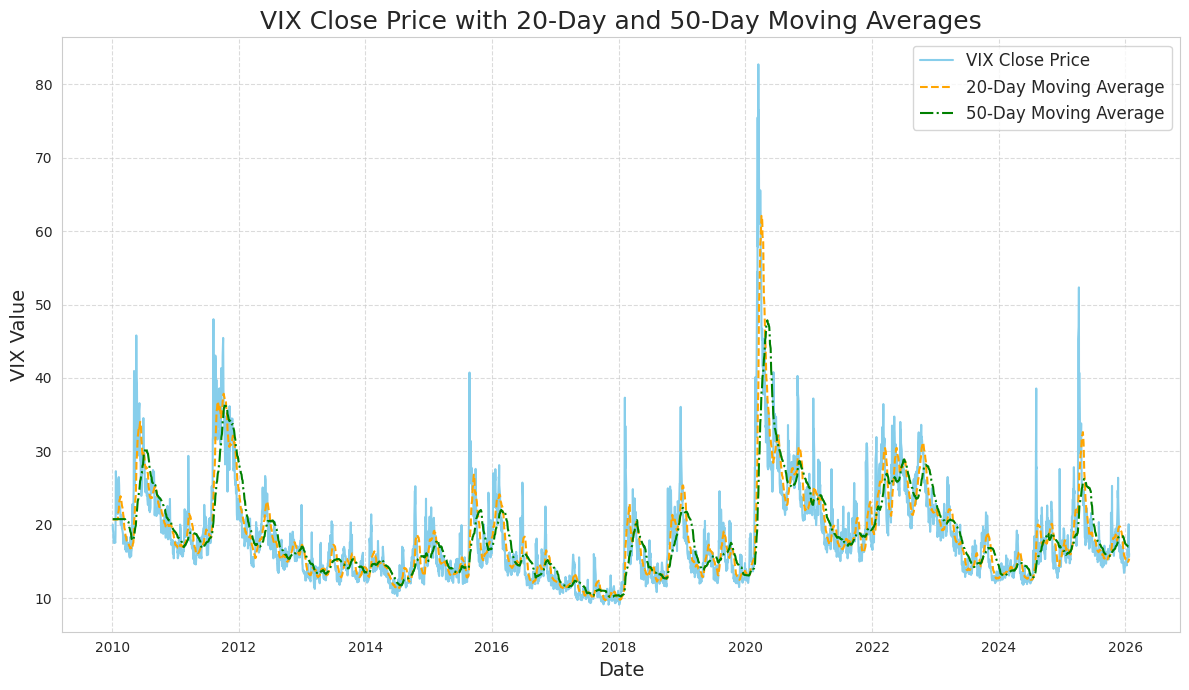

Generating Correlation Matrix...

GRAPH EXPLANATION 7: Feature Correlation Heatmap
This heatmap visualizes the correlation coefficients between different features.
Red indicates strong positive correlation, Blue indicates negative correlation.
This is crucial for feature selection, helping to identify redundant features (multicollinearity).


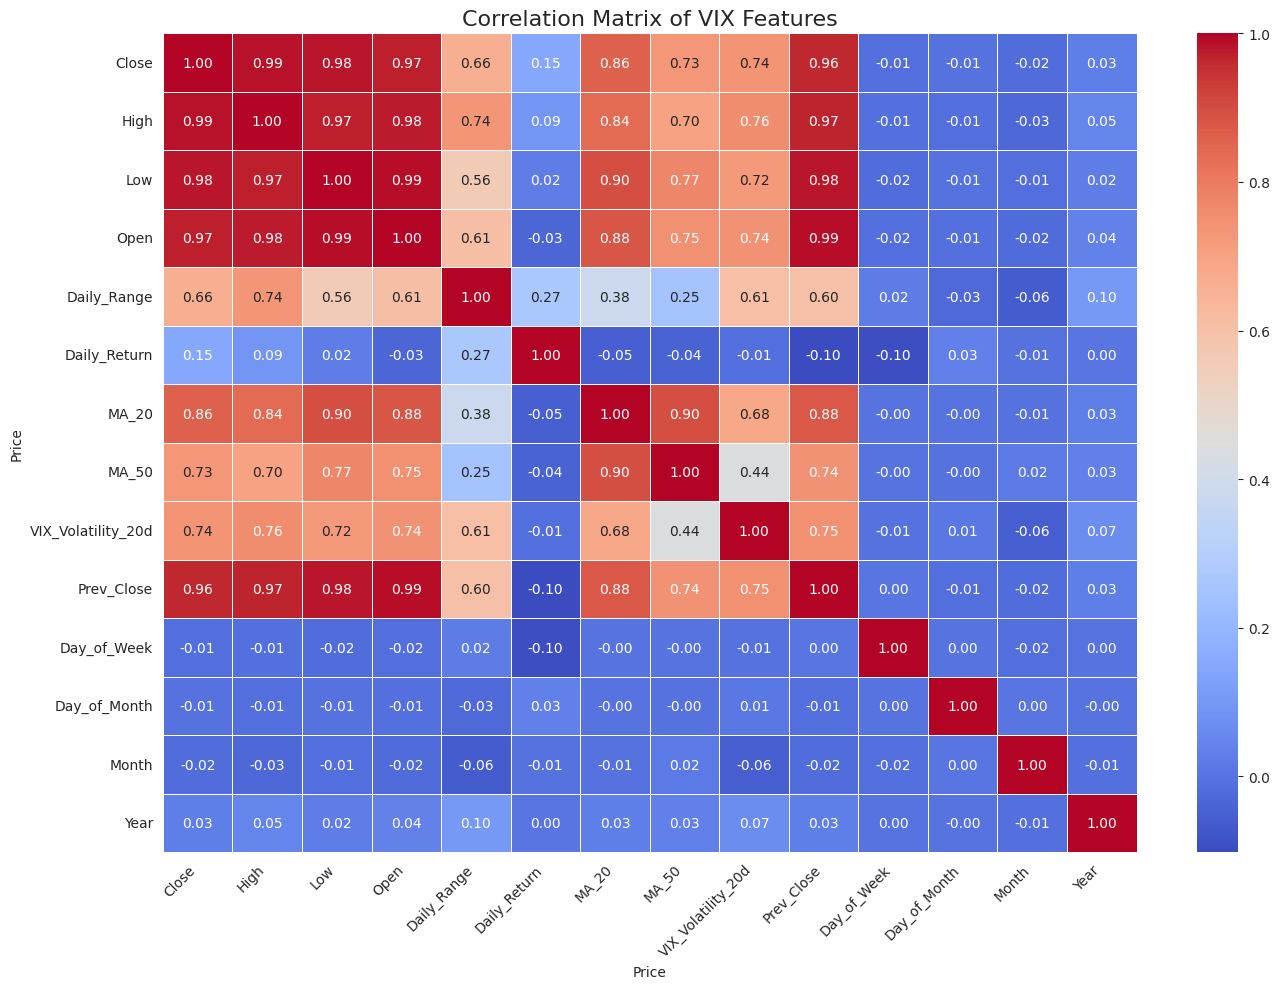


--- Data Scaling & Saving ---
Sample (Min-Max Scaled):


Price,Close,High,Low,Open,Daily_Range,Daily_Return,MA_20,MA_50,VIX_Volatility_20d,Prev_Close,Day_of_Week,Day_of_Month,Month,Year
Date,,,,,,,,,,,,,,
2010-01-04,0.148199,0.162421,0.185569,0.171960,0.033492,0.213481,0.209614,0.280983,0.142342,0.148199,0.00,0.100000,0.0,0.0
2010-01-05,0.138817,0.142069,0.174405,0.149837,0.013064,0.213481,0.209614,0.280983,0.142342,0.148199,0.25,0.133333,0.0,0.0
2010-01-06,0.136234,0.136161,0.165184,0.143594,0.015914,0.229743,0.209614,0.280983,0.142342,0.138817,0.50,0.166667,0.0,0.0


Sample (Standardized):


Price,Close,High,Low,Open,Daily_Range,Daily_Return,MA_20,MA_50,VIX_Volatility_20d,Prev_Close,Day_of_Week,Day_of_Month,Month,Year
Date,,,,,,,,,,,,,,
2010-01-04,0.238512,0.278853,0.390458,0.453079,-0.146460,-0.452400,0.369061,0.411136,0.547329,0.238371,-1.446163,-1.339707,-1.608095,-1.626445
2010-01-05,0.137956,0.075497,0.279804,0.217296,-0.553686,-0.452400,0.369061,0.411136,0.547329,0.238371,-0.731574,-1.225341,-1.608095,-1.626445
2010-01-06,0.110267,0.016459,0.188393,0.150757,-0.496863,-0.155681,0.369061,0.411136,0.547329,0.137815,-0.016985,-1.110976,-1.608095,-1.626445



Processing complete. File saved as 'VIX_Project_Final_Data.csv'.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

# Suppress warnings to keep the output clean
warnings.filterwarnings('ignore')

# ==========================================
# Data Acquisition & Initial Cleaning
# ==========================================
print("---: Downloading VIX Data ---")
# Download VIX data from Yahoo Finance (Start 2010 to present)
df = yf.download("^VIX", start="2010-01-01", progress=False)

# Flatten MultiIndex columns if they exist (common with new yfinance versions)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Sort data by date in ascending order
df.sort_index(ascending=True, inplace=True)

# Remove 'Volume' as it is not applicable for the VIX index
if 'Volume' in df.columns:
    df.drop(columns=['Volume'], inplace=True)

# Forward fill to handle potential missing values
df.ffill(inplace=True)

print(f"Basic cleaning complete. Row count: {len(df)}")

# --- Visualization 1: Basic Price Overview ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 1: VIX Historical Close Price")
print("This chart displays the raw historical daily closing prices of the VIX index from 2010 to the present.")
print("It provides a high-level overview of market volatility trends, showing clearly periods of relative calm")
print("versus periods of extreme market stress (peaks).")
print("="*80)

plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], label='VIX Close Price', color='skyblue', linewidth=1)
plt.title('VIX Close Price Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('VIX Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print basic statistics
close_mean = df['Close'].mean()
close_std = df['Close'].std()
print(f"Mean VIX Close: {close_mean:.2f}")
print(f"Std Dev VIX Close: {close_std:.2f}")

# ==========================================
#  Feature Engineering
# ==========================================
print("\n--- : Feature Engineering ---")

# 1. Price-based features
# Daily Range: Intraday volatility
df['Daily_Range'] = df['High'] - df['Low']
# Daily Return: Percentage change
df['Daily_Return'] = df['Close'].pct_change()

# 2. Technical indicators
# SMA 20: Short-term trend
df['MA_20'] = df['Close'].rolling(window=20).mean()
# SMA 50: Long-term trend
df['MA_50'] = df['Close'].rolling(window=50).mean()
# Volatility: Rolling standard deviation (20 days)
df['VIX_Volatility_20d'] = df['Close'].rolling(window=20).std()

# 3. Lagged features
# Previous Close: Useful for detecting gaps
df['Prev_Close'] = df['Close'].shift(1)

# 4. Time components
df['Day_of_Week'] = df.index.dayofweek
df['Day_of_Month'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
# Quarter End Flag: 1 if it's the last day of a quarter
df['Is_Quarter_End'] = df.index.is_quarter_end.astype(int)

# Fill NaN values generated by rolling windows/shifts
df = df.bfill().ffill()
df.dropna(inplace=True)

# ==========================================
# Advanced Labeling & Logic
# ==========================================
print("\n---  Sentiment & Outlier Detection ---")

# 1. Sentiment Labeling
def get_sentiment(val):
    if val > 30: return "Extreme Fear"
    elif val > 20: return "Elevated Anxiety"
    return "Market Calm"

df['Volatility_Status'] = df['Close'].apply(get_sentiment)

# 2. Outlier Detection (Z-Score method)
# If VIX is more than 3 Standard Deviations from the mean, flag as outlier
threshold = 3
df['Is_Outlier'] = ((df['Close'] - close_mean).abs() > threshold * close_std).astype(int)

# 3. Volatility Spike Target (For Classification Models)
# Flag if Daily Return is > 5%
df['Is_Spike'] = (df['Daily_Return'] > 0.05).astype(int)

print(f"Total rows analyzed: {len(df)}")
print(f"Outliers detected: {df['Is_Outlier'].sum()}")
print("Sample outliers:")
print(df[df['Is_Outlier'] == 1][['Close', 'Volatility_Status']].head())

# ==========================================
#  Advanced Visualizations
# ==========================================
print("\n--- Visualizations ---")

# --- Viz 2: The Mirror Effect (S&P 500 vs VIX) ---
# Note: We download separate data here to compare, without merging into main df
print("Generating Mirror Effect Plot...")
tickers = ["^VIX", "^GSPC"]
data_comp = yf.download(tickers, start="2015-01-01", end="2025-01-01")['Close']
if isinstance(data_comp.columns, pd.MultiIndex):
    data_comp.columns = data_comp.columns.get_level_values(0)

print("\n" + "="*80)
print("GRAPH EXPLANATION 2: The Mirror Effect (Inverse Correlation)")
print("This dual-axis chart compares the S&P 500 index (Blue, Left Axis) with the VIX (Red, Right Axis).")
print("It visually demonstrates the strong inverse correlation: typically, when the S&P 500 drops (market decline),")
print("the VIX spikes (fear increases), and vice versa.")
print("="*80)

fig1, ax1_1 = plt.subplots(figsize=(12, 6))
# Plot S&P 500
ax1_1.plot(data_comp.index, data_comp['^GSPC'], color='blue', label='S&P 500', linewidth=1)
ax1_1.set_ylabel('S&P 500 Index', color='blue', fontsize=12)
ax1_1.tick_params(axis='y', labelcolor='blue')

# Plot VIX on secondary axis
ax1_2 = ax1_1.twinx()
ax1_2.plot(data_comp.index, data_comp['^VIX'], color='red', label='VIX', alpha=0.6, linewidth=1)
ax1_2.set_ylabel('VIX Index (Fear)', color='red', fontsize=12)
ax1_2.tick_params(axis='y', labelcolor='red')

plt.title('The Mirror Effect: S&P 500 vs. VIX', fontsize=16)
fig1.tight_layout()
plt.show() # Display inline

# --- Viz 3: Major Market Events (Last 5 Years) ---
print("Generating Market Events Plot...")
df_5y = df[df.index >= '2020-01-01']

events_eng = {
    '2020-03-16': 'COVID-19 Crash',
    '2022-03-07': 'Ukraine War',
    '2022-10-12': 'Fed Rate Hikes',
    '2023-03-13': 'Banking Crisis',
    '2024-08-05': 'Carry Trade Spike'
}

print("\n" + "="*80)
print("GRAPH EXPLANATION 3: Annotated Major Market Events")
print("This chart zooms in on the last 5 years (2020-2025) and annotates specific global events.")
print("The goal is to provide context to the data, linking statistical spikes in volatility to real-world")
print("crises such as COVID-19, geopolitical conflicts, and economic policy changes.")
print("="*80)

plt.figure(figsize=(15, 8))
plt.plot(df_5y.index, df_5y['Close'], color='#c0392b', linewidth=1.5, alpha=0.9, label='VIX Index')
plt.fill_between(df_5y.index, df_5y['Close'], color='#e74c3c', alpha=0.1)

# Annotate events
for date_str, label in events_eng.items():
    event_date = pd.to_datetime(date_str)
    if event_date in df_5y.index:
        y_val = df_5y.loc[event_date, 'Close']
        plt.annotate(label,
                     xy=(event_date, y_val),
                     xytext=(event_date, y_val + 12),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                     fontsize=10, fontweight='bold', ha='center',
                     bbox=dict(boxstyle="round,pad=0.3", fc="#f1c40f", ec="black", lw=1, alpha=0.9))

plt.title('VIX Index: Major Market Events (2020-2025)', fontsize=20, pad=25)
plt.ylabel('VIX Level (Fear)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# --- Viz 4: Boxplot & Statistical Analysis ---
print("Generating Boxplot...")
# IQR Calculations
Q1_price = df['Close'].quantile(0.25)
Q3_price = df['Close'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_bound = Q3_price + 1.5 * IQR_price

print(f"Median VIX Price: {df['Close'].median():.2f}")
print(f"75% of the time, VIX is below: {Q3_price:.2f}")
print(f"Extreme Event Threshold (Statistical): {upper_bound:.2f}")

print("\n" + "="*80)
print("GRAPH EXPLANATION 4: Boxplot Distribution Analysis")
print("This Boxplot visualizes the statistical distribution of VIX closing prices.")
print("It helps identify the median value, the interquartile range (where 50% of the data lies),")
print("and explicitly highlights 'outliers' - values that are statistically extreme (dots on the right).")
print("In the graph above, the samples within the 25% to 75% range can be seen inside the orange box.")
print(" Additionally, extreme values above a CLOSE value of 31.97 have been classified and can be seen as outliers [חריגים] on the right side of the graph.")
print("From a manual check we conducted in search engines, we discovered that the lowest value of the Fear Index ever recorded was 9.14 in 2017,\n which explains the absence of outliers on the left side of the graph.")
print("="*80)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'], color='salmon')
plt.title('Boxplot of VIX Close Prices - Identifying Extreme Market Fear')
plt.xlabel('VIX Index Value (Price)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# --- Viz 5: Distribution of Returns ---
print("Generating Distribution of Returns Plot...")
mean_ret = df['Daily_Return'].mean()
std_ret = df['Daily_Return'].std()
downside_5 = df['Daily_Return'].quantile(0.05)

print("\n" + "="*80)
print("GRAPH EXPLANATION 5: Distribution of Daily Returns (Histogram)")
print("This histogram shows the frequency of daily percentage changes in the VIX.")
print("The vertical lines mark key statistics: the mean return (Red) and standard deviations (Green).")
print("The Purple line marks the 5% downside risk. This confirms if the data follows a normal distribution or has 'fat tails'.")
print("="*80)

plt.figure(figsize=(12, 7))
ax = sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='skyblue', stat='density')

# Vertical lines for statistics
plt.axvline(mean_ret, color='red', linestyle='--', label=f'Mean: {mean_ret:.4f}')
plt.axvline(mean_ret + std_ret, color='green', linestyle=':', label=f'+1 Std: {mean_ret + std_ret:.4f}')
plt.axvline(mean_ret - std_ret, color='green', linestyle=':', label=f'-1 Std: {mean_ret - std_ret:.4f}')
plt.axvline(downside_5, color='purple', linestyle='-.', label=f'5% Downside: {downside_5:.4f}')

# Format x-axis as percentage
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Distribution of Daily Returns with Key Statistics', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# --- Viz 6: Moving Averages ---
print("Generating Moving Averages Plot...")

print("\n" + "="*80)
print("GRAPH EXPLANATION 6: Trend Analysis with Moving Averages")
print("This plot overlays the 20-day (Orange) and 50-day (Green) Moving Averages on the VIX price.")
print("Moving averages smooth out short-term fluctuations to reveal the underlying trend.")
print("Crossovers between short-term and long-term averages can signal momentum shifts.")
print("="*80)

plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Close'], label='VIX Close Price', color='skyblue')
plt.plot(df.index, df['MA_20'], label='20-Day Moving Average', color='orange', linestyle='--')
plt.plot(df.index, df['MA_50'], label='50-Day Moving Average', color='green', linestyle='-.')

plt.title('VIX Close Price with 20-Day and 50-Day Moving Averages', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('VIX Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Viz 7: Correlation Matrix ---
print("Generating Correlation Matrix...")
numerical_cols_corr = [
    'Close', 'High', 'Low', 'Open', 'Daily_Range', 'Daily_Return',
    'MA_20', 'MA_50', 'VIX_Volatility_20d', 'Prev_Close',
    'Day_of_Week', 'Day_of_Month', 'Month', 'Year'
]

# Create matrix
corr_matrix = df[numerical_cols_corr].corr()

print("\n" + "="*80)
print("GRAPH EXPLANATION 7: Feature Correlation Heatmap")
print("This heatmap visualizes the correlation coefficients between different features.")
print("Red indicates strong positive correlation, Blue indicates negative correlation.")
print("This is crucial for feature selection, helping to identify redundant features (multicollinearity).")
print("="*80)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of VIX Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ==========================================
#  Caling & Saving
# ==========================================
print("\n--- Data Scaling & Saving ---")

# Define numerical columns for scaling (exclude targets/flags)
numerical_cols = [
    'Close', 'High', 'Low', 'Open', 'Daily_Range', 'Daily_Return',
    'MA_20', 'MA_50', 'VIX_Volatility_20d', 'Prev_Close',
    'Day_of_Week', 'Day_of_Month', 'Month', 'Year'
]

# 1. Min-Max Normalization
df_scaled = df.copy()
minmax_scaler = MinMaxScaler()
df_scaled[numerical_cols] = minmax_scaler.fit_transform(df_scaled[numerical_cols])

print("Sample (Min-Max Scaled):")
display(df_scaled[numerical_cols].head(3))

# 2. Standardization (Z-Score)
df_standardized = df.copy()
standard_scaler = StandardScaler()
df_standardized[numerical_cols] = standard_scaler.fit_transform(df_standardized[numerical_cols])

print("Sample (Standardized):")
display(df_standardized[numerical_cols].head(3))

# Save the final processed file (using the original df, not scaled, to preserve meaning)
df.to_csv('VIX_Project_Final_Data.csv', index=True)
print("\nProcessing complete. File saved as 'VIX_Project_Final_Data.csv'.")

## Prophet Model


---  Prophet Modeling ---

--- A. Generating Future Forecast (Next 90 Days) ---

GRAPH EXPLANATION 8: Prophet Full History Forecast
This chart displays the entire history of the VIX (black dots) along with the Prophet model's trend prediction (blue line).
The extension to the right shows the model's projection for the next 90 days.


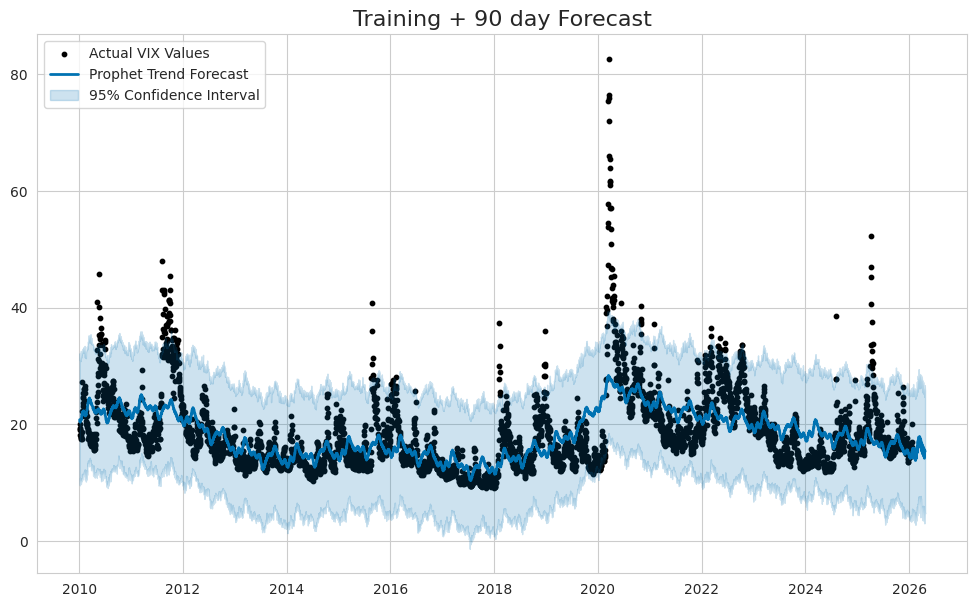


GRAPH EXPLANATION 9: Prophet Model Components Decomposed
These plots break down the VIX into Trend, Weekly Seasonality, and Yearly Seasonality.


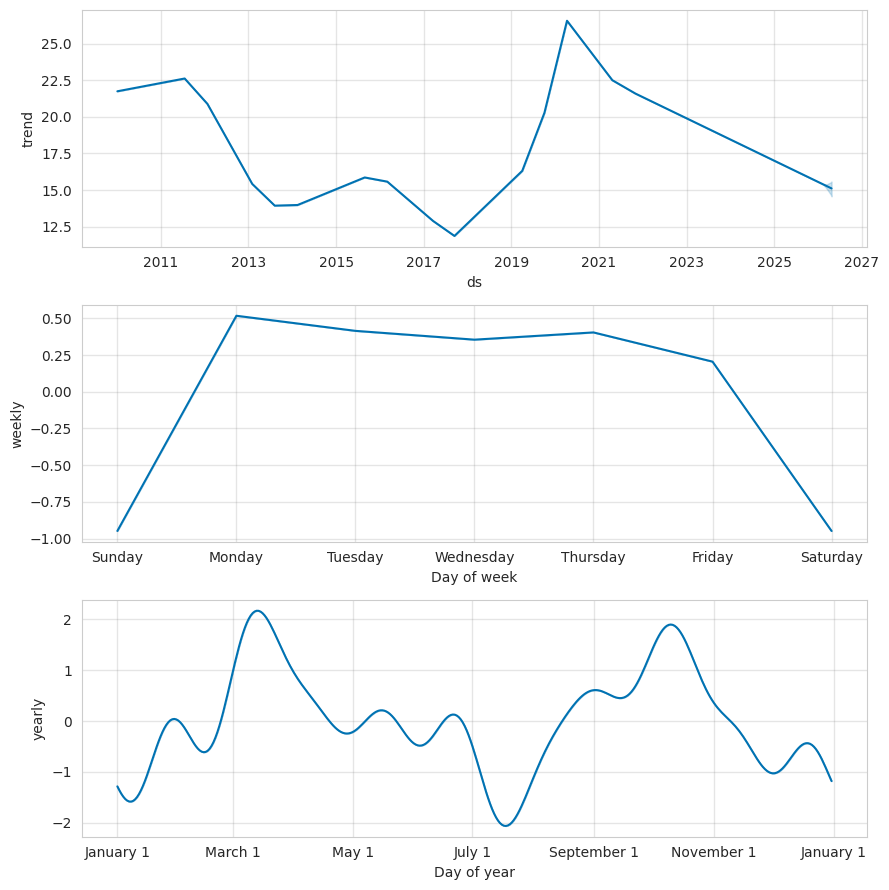


GRAPH EXPLANATION 10: Zoomed-in 90-Day Forecast
This chart isolates the prediction for the *future* 90 days only.


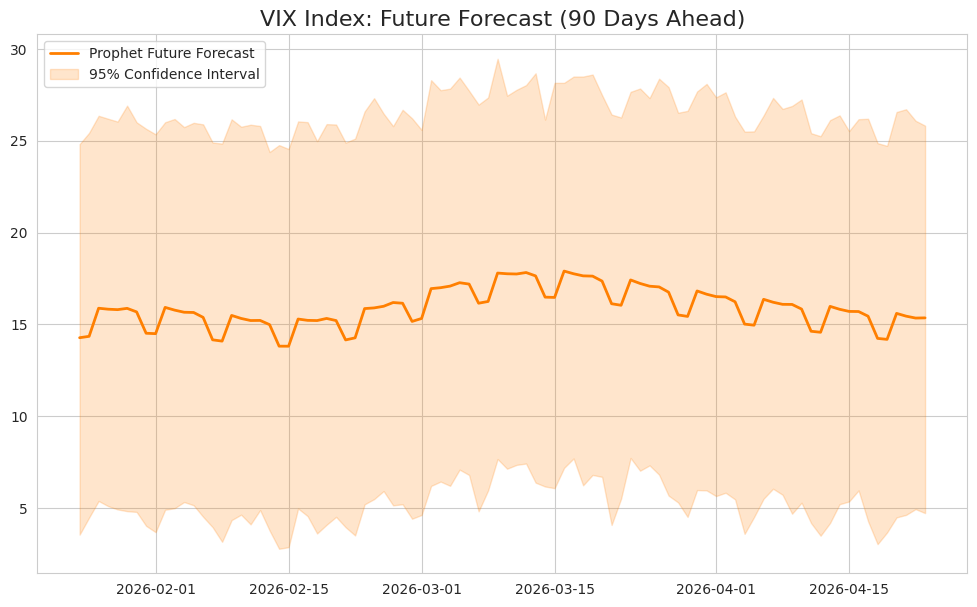


--- B. Analyzing Holiday Effects (Statistical) ---

GRAPH EXPLANATION 11: VIX Levels Before Major Holidays
Comparing average VIX levels before holidays vs the market average (red line).


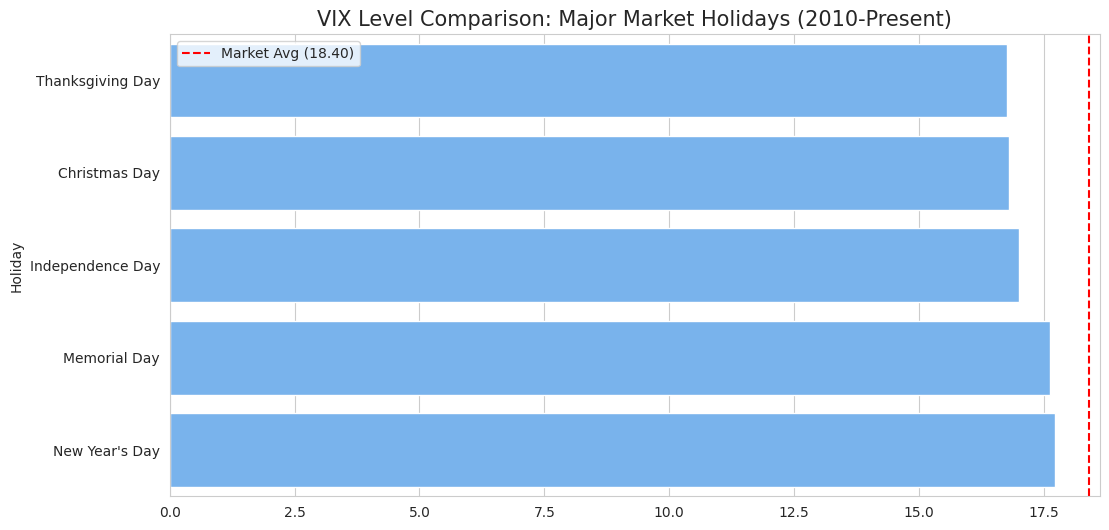

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Overall Market Average: 18.40

                  Avg VIX Close
Holiday                        
Thanksgiving Day      16.766875
Christmas Day         16.802500
Independence Day      17.009375
Memorial Day          17.631250
New Year's Day        17.734667

--- C. Model Evaluation: Prophet with US Holidays ---
--- Performance Metrics: Prophet (With Holidays) ---
MAE: 2.1252
MSE: 9.4833
RMSE: 3.0795
MAPE: 11.18%
R-squared: -0.4460

GRAPH EXPLANATION 12: Prophet Components with Holiday Effect
Visualizing the impact of US holidays on the forecast.


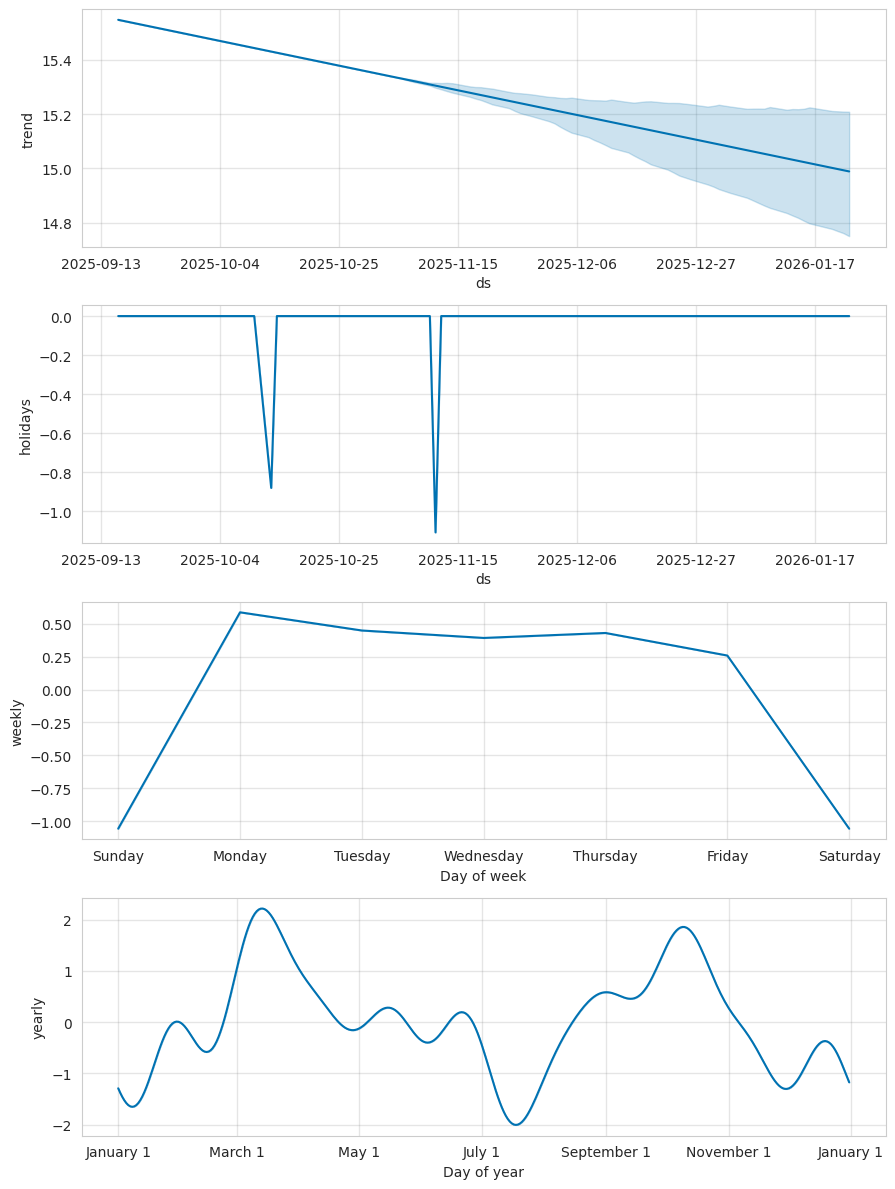


GRAPH EXPLANATION 13: Prophet Prediction vs. Actual Data (Backtesting)
Comparing the model's predictions (Orange) against actual values (Blue) for the last 90 days.


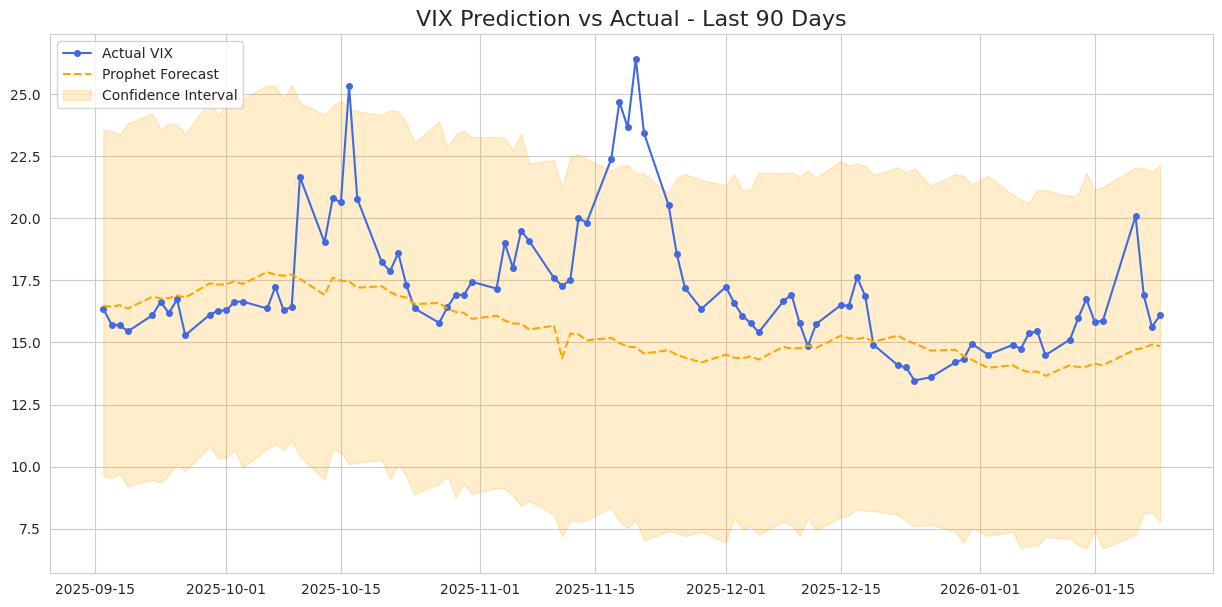

INFO:prophet:Making 22 forecasts with cutoffs between 2015-02-10 00:00:00 and 2025-06-17 00:00:00



--- D. Cross Validation ---
Running Cross Validation (This may take a minute)...


  0%|          | 0/22 [00:00<?, ?it/s]

Cross Validation Performance Metrics (Head):
  horizon        mse      rmse       mae      mape     mdape     smape  \
0 10 days  16.998620  4.122938  3.312776  0.211529  0.175954  0.195547   
1 11 days  22.723563  4.766924  3.443401  0.208282  0.177309  0.198285   
2 12 days  27.663253  5.259587  3.717687  0.219126  0.183905  0.211666   
3 13 days  30.564134  5.528484  3.853853  0.224959  0.184956  0.218984   
4 14 days  34.350025  5.860889  3.916558  0.223972  0.179680  0.220923   

   coverage  
0  0.840861  
1  0.836765  
2  0.806863  
3  0.801471  
4  0.815651  

GRAPH EXPLANATION 13b: Cross Validation Error (MAE) over Horizon
This chart visualizes how the model's error (MAE) changes as we forecast further into the future.
- X-axis: Days into the future (0 to 90).
- Y-axis: Error magnitude.
- Blue Line: Average error trend.


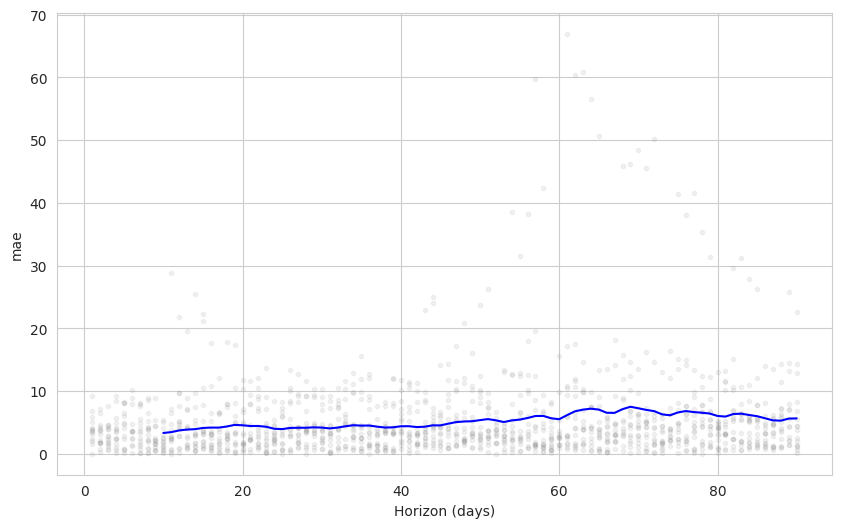

In [ ]:
# ==========================================
# Prophet Modeling & Forecasting (Complete)
# ==========================================
print("\n---  Prophet Modeling ---")

# Import Step-Specific Libraries
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import holidays
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ---------------------------------------------------------
# 1. Data Preparation
# ---------------------------------------------------------
# Prophet requires 'ds' (Date) and 'y' (Target) columns.
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

# ---------------------------------------------------------
# A. Future Forecast (Training on Full Data + 90 Days)
# ---------------------------------------------------------
print("\n--- A. Generating Future Forecast (Next 90 Days) ---")

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    interval_width=0.95
)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# --- Visualization 1 ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 8: Prophet Full History Forecast")
print("This chart displays the entire history of the VIX (black dots) along with the Prophet model's trend prediction (blue line).")
print("The extension to the right shows the model's projection for the next 90 days.")
print("="*80)

plt.figure(figsize=(12, 7))
plt.scatter(df_prophet['ds'], df_prophet['y'], color='black', s=10, label='Actual VIX Values')
plt.plot(forecast['ds'], forecast['yhat'], color='#0072B2', lw=2, label='Prophet Trend Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='#0772B2', alpha=0.2, label='95% Confidence Interval')
plt.title('Training + 90 day Forecast', fontsize=16)
plt.legend(loc='upper left')
plt.show()

# --- Visualization 2 ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 9: Prophet Model Components Decomposed")
print("These plots break down the VIX into Trend, Weekly Seasonality, and Yearly Seasonality.")
print("="*80)
fig_components = model.plot_components(forecast)
plt.show()

# --- Visualization 3 ---
last_historical_date = df_prophet['ds'].max()
future_forecast = forecast[forecast['ds'] > last_historical_date]

print("\n" + "="*80)
print("GRAPH EXPLANATION 10: Zoomed-in 90-Day Forecast")
print("This chart isolates the prediction for the *future* 90 days only.")
print("="*80)

plt.figure(figsize=(12, 7))
plt.plot(future_forecast['ds'], future_forecast['yhat'], color='#FF7F00', lw=2, label='Prophet Future Forecast')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'],
                 color='#FF7F00', alpha=0.2, label='95% Confidence Interval')
plt.title('VIX Index: Future Forecast (90 Days Ahead)', fontsize=16)
plt.legend(loc='upper left')
plt.show()

# ---------------------------------------------------------
# B. Holiday Statistical Analysis
# ---------------------------------------------------------
print("\n--- B. Analyzing Holiday Effects (Statistical) ---")

major_holidays_list = ["New Year's Day", "Memorial Day", "Independence Day", "Thanksgiving Day", "Christmas Day"]
years = range(2010, 2026)
us_holidays = holidays.US(years=years)
holiday_results = []

def get_vix_before_holiday(holiday_date, df):
    target_date = pd.Timestamp(holiday_date)
    before_holiday = df[df.index <= target_date]
    if not before_holiday.empty:
        return before_holiday.iloc[-1]['Close']
    return None

for date, name in sorted(us_holidays.items()):
    clean_name = name.replace(" (Observed)", "")
    if clean_name in major_holidays_list:
        vix_val = get_vix_before_holiday(date, df)
        if vix_val is not None:
            holiday_results.append({'Holiday': clean_name, 'VIX_Value': vix_val})

holiday_summary_df = pd.DataFrame(holiday_results)
holiday_averages = holiday_summary_df.groupby('Holiday')['VIX_Value'].mean().sort_values()
overall_average = df['Close'].mean()

# --- Visualization 4 ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 11: VIX Levels Before Major Holidays")
print("Comparing average VIX levels before holidays vs the market average (red line).")
print("="*80)

plt.figure(figsize=(12, 6))
colors = ['#66b3ff' if x < overall_average else '#ff9999' for x in holiday_averages]
sns.barplot(x=holiday_averages.values, y=holiday_averages.index, palette=colors)
plt.axvline(overall_average, color='red', linestyle='--', label=f'Market Avg ({overall_average:.2f})')
plt.title('VIX Level Comparison: Major Market Holidays (2010-Present)', fontsize=15)
plt.legend()
plt.show()

print(f"Overall Market Average: {overall_average:.2f}\n")
print(holiday_averages.to_frame(name='Avg VIX Close'))

# ---------------------------------------------------------
# C. Model Evaluation (Train/Test Split with Holidays)
# ---------------------------------------------------------
print("\n--- C. Model Evaluation: Prophet with US Holidays ---")

train = df_prophet[:-90]
test = df_prophet[-90:]

# DEFINING MODEL_FINAL HERE (This fixes your NameError)
model_final = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_final.add_country_holidays(country_name='US')
model_final.fit(train)

forecast_test_set = model_final.predict(test[['ds']])

y_true_prophet = test['y'].values
y_pred_prophet = forecast_test_set['yhat'].values

mae_prophet = mean_absolute_error(y_true_prophet, y_pred_prophet)
mse_prophet = mean_squared_error(y_true_prophet, y_pred_prophet)
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(y_true_prophet, y_pred_prophet)
mape_prophet = np.mean(np.abs((y_true_prophet - y_pred_prophet) / np.where(y_true_prophet == 0, 1e-8, y_true_prophet))) * 100

print("--- Performance Metrics: Prophet (With Holidays) ---")
print(f"MAE: {mae_prophet:.4f}")
print(f"MSE: {mse_prophet:.4f}")
print(f"RMSE: {rmse_prophet:.4f}")
print(f"MAPE: {mape_prophet:.2f}%")
print(f"R-squared: {r2_prophet:.4f}")

# --- Visualization 5 ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 12: Prophet Components with Holiday Effect")
print("Visualizing the impact of US holidays on the forecast.")
print("="*80)
fig_components = model_final.plot_components(forecast_test_set)
plt.show()

# --- Visualization 6 ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 13: Prophet Prediction vs. Actual Data (Backtesting)")
print("Comparing the model's predictions (Orange) against actual values (Blue) for the last 90 days.")
print("="*80)

plt.figure(figsize=(15, 7))
plt.plot(test['ds'], y_true_prophet, label='Actual VIX', color='royalblue', marker='o', markersize=4)
plt.plot(forecast_test_set['ds'], y_pred_prophet, label='Prophet Forecast', color='orange', linestyle='--')
plt.fill_between(forecast_test_set['ds'], forecast_test_set['yhat_lower'], forecast_test_set['yhat_upper'],
                 color='orange', alpha=0.2, label='Confidence Interval')
plt.title('VIX Prediction vs Actual - Last 90 Days', fontsize=16)
plt.legend(loc='upper left')
plt.show()

# ---------------------------------------------------------
# D. Cross Validation (New Addition)
# ---------------------------------------------------------
print("\n--- D. Cross Validation ---")
print("Running Cross Validation (This may take a minute)...")

# Prophet's Cross Validation splits the time series into multiple segments
# initial='1825 days': Train on first 5 years
# period='180 days': Move forward by 180 days
# horizon='90 days': Predict next 90 days
df_cv = cross_validation(model_final, initial='1825 days', period='180 days', horizon='90 days')

df_p = performance_metrics(df_cv)
print("Cross Validation Performance Metrics (Head):")
print(df_p.head())

# --- Visualization 7: Cross Validation Metric ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 13b: Cross Validation Error (MAE) over Horizon")
print("This chart visualizes how the model's error (MAE) changes as we forecast further into the future.")
print("- X-axis: Days into the future (0 to 90).")
print("- Y-axis: Error magnitude.")
print("- Blue Line: Average error trend.")
print("="*80)

fig = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()


## Prophet Model Analysis: Key Findings

In this section, we used **Facebook Prophet** to test if the VIX index follows predictable seasonal patterns or is influenced by calendar events.

**Key Takeaways:**

1. **Lack of Seasonality:** The VIX is driven by market events, not time cycles. Prophet struggled to predict sudden volatility spikes because the VIX does not follow a clear weekly or yearly pattern.
2. **The Holiday Effect:** While we analyzed whether markets "calm down" before holidays, adding this data did not significantly improve the model's accuracy.
3. **Performance:** The low  score confirms that a linear time-series model is insufficient for volatility forecasting.

**Conclusion:** To predict the VIX effectively, we must move beyond simple time-series forecasting to more complex models like **Random Forest** (for spike detection) and **LSTM** (for deep learning patterns).

## Random Forest Model


--- Random Forest Model (Spike Detection) ---
Train Shape: (3231, 14), Test Shape: (808, 14)
Training Random Forest with GridSearchCV...
Best Parameters Found: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 500}

--- Random Forest Performance ---
Accuracy Score: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       661
           1       0.90      0.65      0.76       147

    accuracy                           0.92       808
   macro avg       0.91      0.82      0.86       808
weighted avg       0.92      0.92      0.92       808


GRAPH EXPLANATION 14: Confusion Matrix (Classification Accuracy)
This heatmap shows how well the model distinguishes between 'Normal Days' (0) and 'Spikes' (1).
- True Negatives (Top-Left): Correctly predicted normal days.
- True Positives (Bottom-Right): Correctly predicted spikes (Hit).
- False Negatives (Bottom-Left): Missed spikes (Target is 1, Predicted 0).
- 

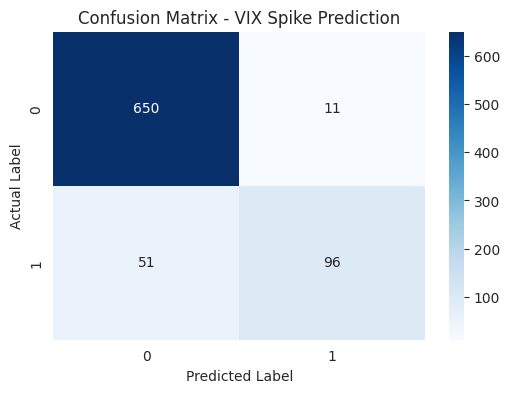


--- Numerical Error Metrics (RF as Binary) ---
Mean Absolute Error (MAE): 0.0767
Mean Squared Error (MSE): 0.0767
Root Mean Squared Error (RMSE): 0.2770

GRAPH EXPLANATION 15: Precision-Recall Curve
Since VIX spikes are rare events (imbalanced data), the PR Curve is more informative than ROC.
- Precision (Y-axis): When the model predicts a spike, how often is it correct?
- Recall (X-axis): Out of all actual spikes, how many did the model find?
A larger Area Under Curve (AUC) indicates a more robust model.


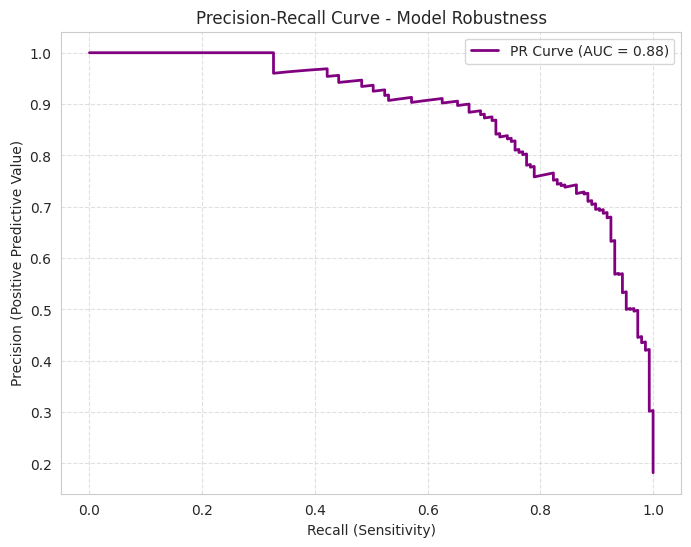


GRAPH EXPLANATION 16: Feature Importance
This chart ranks the input variables based on their influence on the Random Forest model.
It reveals which indicators (e.g., Moving Averages, Past Volatility) are the strongest predictors
of an upcoming VIX spike, helping to explain the 'black box' logic of the algorithm.


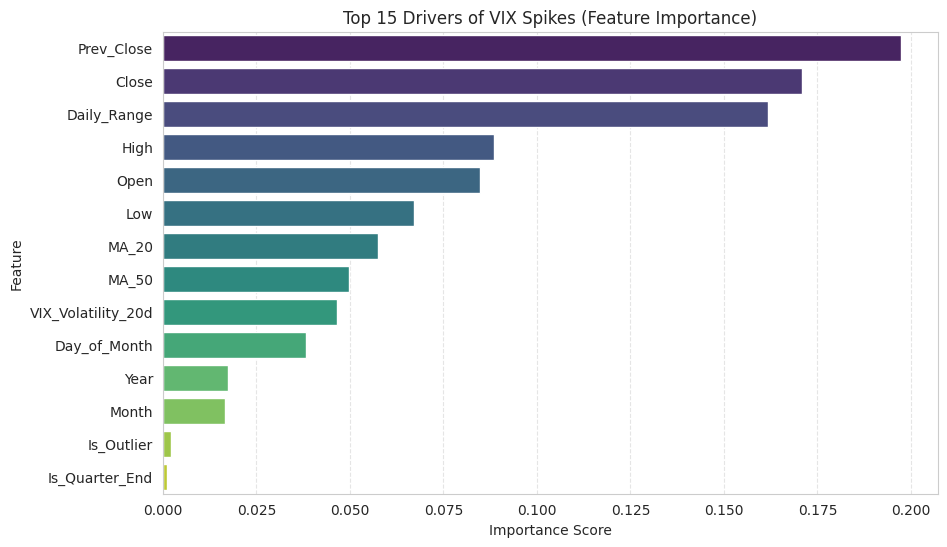

In [ ]:
# ==========================================
# Random Forest Classification
# ==========================================
print("\n--- Random Forest Model (Spike Detection) ---")

# Import Step-Specific Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_recall_curve, auc, mean_absolute_error, mean_squared_error)

# ---------------------------------------------------------
# 1. Feature Selection & Data Splitting
# ---------------------------------------------------------
# Define X (Features) and y (Target)
# We drop columns that cause data leakage or are irrelevant for prediction
# 'Daily_Return' is derived directly from Close, and Volatility_Status is a label derived from Close.
X = df.drop(columns=['Is_Spike', 'Daily_Return', 'Day_of_Week', 'Volatility_Status'])
y = df['Is_Spike']

# Split into Train and Test sets
# CRITICAL: We use shuffle=False to maintain chronological order (Time Series data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

# ---------------------------------------------------------
# 2. Model Training with Grid Search
# ---------------------------------------------------------
print("Training Random Forest with GridSearchCV...")

# Initialize Random Forest with balanced class weights (to handle rare spikes)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define parameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 500],       # Number of trees
    'max_depth': [10, 20, None],           # Tree depth
    'min_samples_split': [2, 5, 10]        # Minimum samples to split a node
}

# Use TimeSeriesSplit for cross-validation to respect time order
tscv = TimeSeriesSplit(n_splits=5)

# Perform Grid Search to find best hyperparameters (Optimization metric: F1 Score)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=tscv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model
best_rf_model = grid_search.best_estimator_
print(f"Best Parameters Found: {grid_search.best_params_}")

# ---------------------------------------------------------
# 3. Model Evaluation (Classification Metrics)
# ---------------------------------------------------------
# Make predictions on Test set
y_pred = best_rf_model.predict(X_test)

print("\n--- Random Forest Performance ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Visualization 1: Confusion Matrix ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 14: Confusion Matrix (Classification Accuracy)")
print("This heatmap shows how well the model distinguishes between 'Normal Days' (0) and 'Spikes' (1).")
print("- True Negatives (Top-Left): Correctly predicted normal days.")
print("- True Positives (Bottom-Right): Correctly predicted spikes (Hit).")
print("- False Negatives (Bottom-Left): Missed spikes (Target is 1, Predicted 0).")
print("- False Positives (Top-Right): False alarms (Target is 0, Predicted 1).")
print("="*80)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - VIX Spike Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# ---------------------------------------------------------
# 4. Numerical Error Metrics (Binary as Continuous)
# ---------------------------------------------------------
# Calculating MAE/MSE on binary outcomes (0 vs 1) to compare with other models loosely
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)

print("\n--- Numerical Error Metrics (RF as Binary) ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

# ---------------------------------------------------------
# 5. Advanced Evaluation: Precision-Recall Curve
# ---------------------------------------------------------
# Get probability scores for the positive class (Spike)
y_scores = best_rf_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)
auc_score = auc(recall, precision)

# --- Visualization 2: PR Curve ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 15: Precision-Recall Curve")
print("Since VIX spikes are rare events (imbalanced data), the PR Curve is more informative than ROC.")
print("- Precision (Y-axis): When the model predicts a spike, how often is it correct?")
print("- Recall (X-axis): Out of all actual spikes, how many did the model find?")
print("A larger Area Under Curve (AUC) indicates a more robust model.")
print("="*80)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {auc_score:.2f})', color='purple', linewidth=2)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve - Model Robustness')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ---------------------------------------------------------
# 6. Feature Importance
# ---------------------------------------------------------
# Extract feature importance from the trained model
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# --- Visualization 3: Feature Importance Bar Plot ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 16: Feature Importance")
print("This chart ranks the input variables based on their influence on the Random Forest model.")
print("It reveals which indicators (e.g., Moving Averages, Past Volatility) are the strongest predictors")
print("of an upcoming VIX spike, helping to explain the 'black box' logic of the algorithm.")
print("="*80)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Drivers of VIX Spikes (Feature Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

## Model Analysis: Random Forest for Spike Detection
In this section, we shifted our strategy from predicting prices (Regression) to predicting risks (Classification). The goal was to determine if the VIX would "spike" (rise > 5%) on the following day.

Key Findings:

Early Warning System: Unlike linear models (like Prophet), Random Forest effectively distinguishes between "normal" market days and "high-risk" days.

Volatility Clustering: The Feature Importance analysis reveals that prior volatility metrics (e.g., Daily_Range, VIX_Volatility_20d) are the strongest predictors of an impending spike.

Handling Rarity: Since market crashes are rare events, we optimized the model using Balanced Class Weights. This prioritizes Recall, ensuring the model captures potential crises even if it means tolerating a few false alarms.

## LSTM Model


In [ ]:
# ==========================================
# Data Prep for Classification (Spike Detection)
# ==========================================
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt


print("--- Step 1: Preparing Data for Classification ---")

# Ensure 'X' from previous steps defines the feature columns
features_cols = X.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features_cols])

# 2. Function to create sequences (Lookback)
def create_sequences(data, target, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:(i + time_steps)])
        y_seq.append(target.iloc[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
# 'y' here refers to the 'Is_Spike' column from previous steps
X_lstm, y_lstm = create_sequences(scaled_data, y, time_steps)

# 3. Split into Train and Test (Chronological order)
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

print(f"Train shape: {X_train_lstm.shape}")
print(f"Test shape: {X_test_lstm.shape}")

# ==========================================
#  Training LSTM Classifier (Weighted)
# ==========================================

print(" Training LSTM Classifier ---")

# 1. Calculate class weights (to handle imbalanced spikes)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_lstm),
    y=y_train_lstm
)
class_weights_dict = {0: class_weights_array[0], 1: class_weights_array[1]}
print(f"Class Weights: {class_weights_dict}")

# 2. Define the LSTM model
model_lstm_weighted = Sequential([
    LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model_lstm_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the model
history_weighted = model_lstm_weighted.fit(
    X_train_lstm, y_train_lstm,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    class_weight=class_weights_dict
)

print("Training Complete.")

--- Step 1: Preparing Data for Classification ---
Train shape: (3223, 10, 14)
Test shape: (806, 10, 14)
 Training LSTM Classifier ---
Class Weights: {0: np.float64(0.6282651072124756), 1: np.float64(2.4490881458966567)}
Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5865 - loss: 0.6962 - val_accuracy: 0.5418 - val_loss: 0.6871
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5709 - loss: 0.6893 - val_accuracy: 0.6130 - val_loss: 0.6649
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5853 - loss: 0.6828 - val_accuracy: 0.2972 - val_loss: 0.7278
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5121 - loss: 0.6836 - val_accuracy: 0.6099 - val_loss: 0.6716
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5725 - loss: 0.6815 - val_accuracy: 0.5882 - val_loss: 0.6718
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4982 - loss: 0.6819 - val_accuracy: 0.5759 - val_loss: 0.6792
Epoch 7/20
91/91 ━━━━━━

--- Evaluating Classification Model ---
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

--- LSTM Performance with Class Weights ---
              precision    recall  f1-score   support

           0       0.80      0.32      0.46       659
           1       0.17      0.64      0.27       147

    accuracy                           0.38       806
   macro avg       0.49      0.48      0.37       806
weighted avg       0.69      0.38      0.43       806

LSTM MAE: 0.6203
LSTM MSE: 0.6203

GRAPH EXPLANATION 17: LSTM Training Loss Curve
This chart tracks the model's error rate (Loss) over time (Epochs).
- Train Loss (Blue): How well the model learns from known data.
- Val Loss (Orange): How well the model generalizes to new data.
Ideally, both lines should decrease. If Val Loss rises while Train Loss drops, it indicates Overfitting.


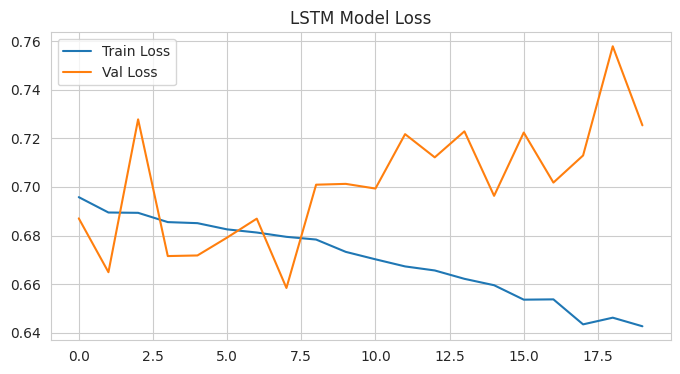


GRAPH EXPLANATION 18: LSTM Spike Detection & Confidence Levels
Top Chart: Visualizes the VIX price (Gray) with Spikes overlay.
   - Blue Triangles: Actual Spikes that occurred.
   - Red 'X': Spikes predicted by the LSTM model.
   (We want to see Red X's exactly on top of Blue Triangles).
Bottom Chart: The model's internal 'confidence' or probability (0 to 1).
   - Green Line: The calculated probability of a spike.
   - Red Dashed Line: The decision threshold (0.5). Any green value above this line triggers a prediction.


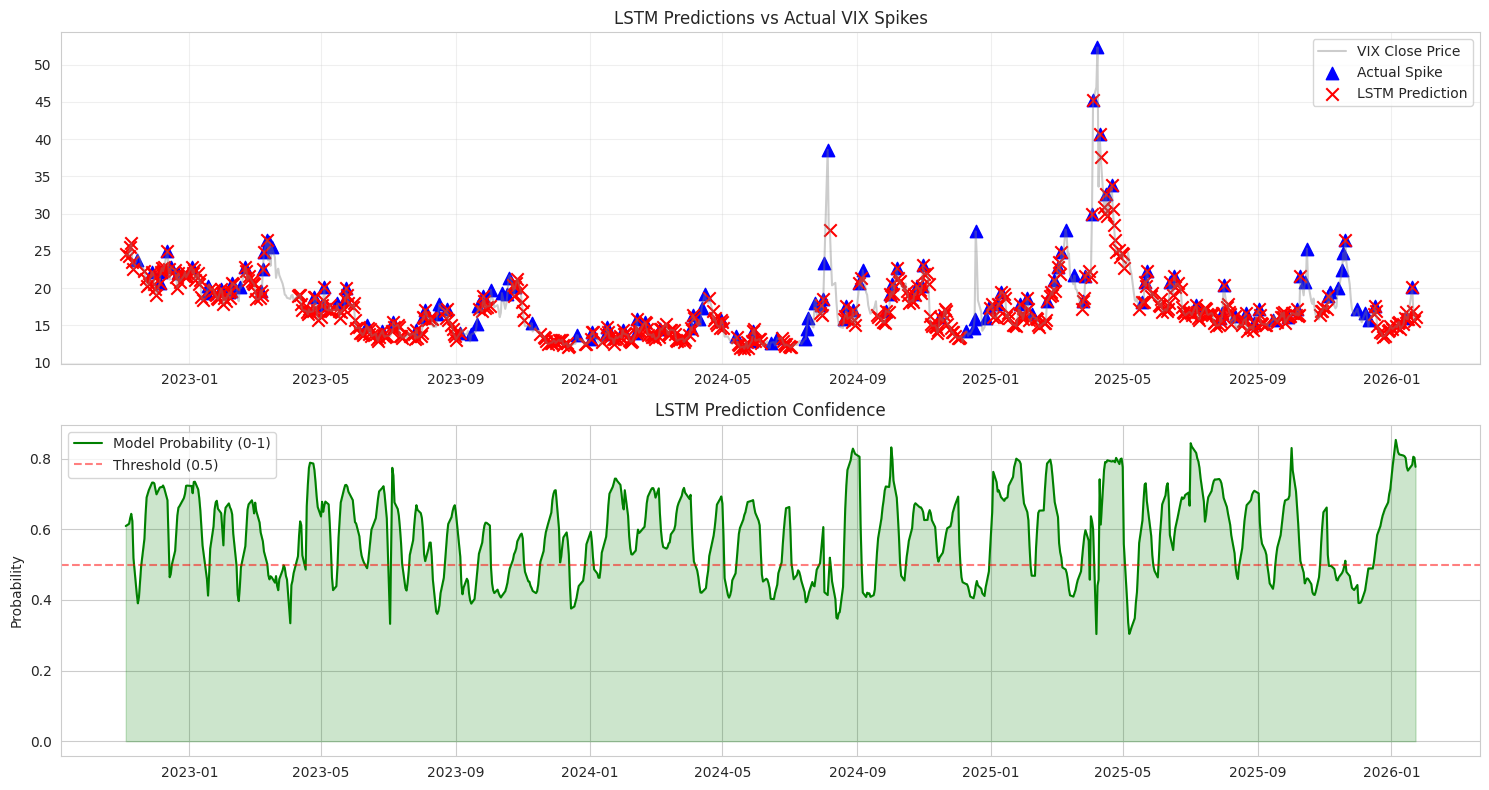

In [ ]:
# ==========================================
# Evaluation & Visualization (Classification)
# ==========================================
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error

print("--- Evaluating Classification Model ---")

# 1. Make predictions
y_pred_lstm_prob_weighted = model_lstm_weighted.predict(X_test_lstm)
y_pred_lstm_weighted = (y_pred_lstm_prob_weighted > 0.5).astype(int)

# 2. Print Report
print("\n--- LSTM Performance with Class Weights ---")
print(classification_report(y_test_lstm, y_pred_lstm_weighted))

# 3. Calculate numerical metrics
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm_weighted)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm_weighted)
print(f"LSTM MAE: {mae_lstm:.4f}")
print(f"LSTM MSE: {mse_lstm:.4f}")

# 4. Plot Loss
print("\n" + "="*80)
print("GRAPH EXPLANATION 17: LSTM Training Loss Curve")
print("This chart tracks the model's error rate (Loss) over time (Epochs).")
print("- Train Loss (Blue): How well the model learns from known data.")
print("- Val Loss (Orange): How well the model generalizes to new data.")
print("Ideally, both lines should decrease. If Val Loss rises while Train Loss drops, it indicates Overfitting.")
print("="*80)

plt.figure(figsize=(8, 4))
plt.plot(history_weighted.history['loss'], label='Train Loss')
plt.plot(history_weighted.history['val_loss'], label='Val Loss')
plt.title('LSTM Model Loss')
plt.legend()
plt.show()

# 5. Advanced Plot: Predictions vs Actual Spikes
test_dates = df.index[-len(y_test_lstm):]
test_close_prices = df.loc[test_dates, 'Close']

print("\n" + "="*80)
print("GRAPH EXPLANATION 18: LSTM Spike Detection & Confidence Levels")
print("Top Chart: Visualizes the VIX price (Gray) with Spikes overlay.")
print("   - Blue Triangles: Actual Spikes that occurred.")
print("   - Red 'X': Spikes predicted by the LSTM model.")
print("   (We want to see Red X's exactly on top of Blue Triangles).")
print("Bottom Chart: The model's internal 'confidence' or probability (0 to 1).")
print("   - Green Line: The calculated probability of a spike.")
print("   - Red Dashed Line: The decision threshold (0.5). Any green value above this line triggers a prediction.")
print("="*80)

plt.figure(figsize=(15, 8))

# Upper Plot: Price and Spikes
plt.subplot(2, 1, 1)
plt.plot(test_dates, test_close_prices, label='VIX Close Price', color='gray', alpha=0.4)
actual_indices = test_dates[y_test_lstm == 1]
plt.scatter(actual_indices, test_close_prices[y_test_lstm == 1],
            color='blue', label='Actual Spike', marker='^', s=80)
predicted_indices = test_dates[y_pred_lstm_weighted.flatten() == 1]
plt.scatter(predicted_indices, test_close_prices[y_pred_lstm_weighted.flatten() == 1],
            color='red', label='LSTM Prediction', marker='x', s=80)
plt.title('LSTM Predictions vs Actual VIX Spikes')
plt.legend()
plt.grid(True, alpha=0.3)

# Lower Plot: Probability
plt.subplot(2, 1, 2)
plt.plot(test_dates, y_pred_lstm_prob_weighted, color='green', label='Model Probability (0-1)')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Threshold (0.5)')
plt.fill_between(test_dates, 0, y_pred_lstm_prob_weighted.flatten(), alpha=0.2, color='green')
plt.ylabel('Probability')
plt.title('LSTM Prediction Confidence')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# ==========================================
# Data Prep for Regression (Price Prediction)
# ==========================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

print("---  Preparing Data for Regression ---")

# Features & Target
features = ['Close', 'High', 'Low', 'Open', 'Daily_Range', 'Daily_Return', 'MA_20', 'VIX_Volatility_20d']
target = 'Close'

# 1. Normalize Data (0-1 Scaling)
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

scaled_features = scaler_features.fit_transform(df[features])
scaled_target = scaler_target.fit_transform(df[[target]])

# 2. Create Sequences (Lookback = 60)
def create_sequences_reg(features_data, target_data, look_back=60):
    X, y = [], []
    for i in range(look_back, len(features_data)):
        X.append(features_data[i-look_back:i])
        y.append(target_data[i, 0])
    return np.array(X), np.array(y)

look_back = 60
X_reg, y_reg = create_sequences_reg(scaled_features, scaled_target, look_back)

# 3. Split Train/Test
train_size = int(len(X_reg) * 0.8)
X_train_reg, X_test_reg = X_reg[:train_size], X_reg[train_size:]
y_train_reg, y_test_reg = y_reg[:train_size], y_reg[train_size:]

print(f"Regression Train Shape: {X_train_reg.shape}")

# ==========================================
# Basic LSTM Regression (No Regularization)
# ==========================================


print("--- Step 5: Training Basic LSTM ---")

# 1. Define Model
model = Sequential()
model.add(LSTM(units=8, input_shape=(X_train_reg.shape[1], X_train_reg.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 2. Train
history = model.fit(X_train_reg, y_train_reg, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# 3. Predict & Rescale
predictions = model.predict(X_test_reg)
predictions_rescaled = scaler_target.inverse_transform(predictions)
y_test_rescaled = scaler_target.inverse_transform(y_test_reg.reshape(-1, 1))

# 4. Metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)



---  Preparing Data for Regression ---
Regression Train Shape: (3183, 60, 8)
--- Step 5: Training Basic LSTM ---
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0392 - val_loss: 0.0051
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━

RMSE: 2.31
MAE: 1.28
R2 Score: 0.71

GRAPH EXPLANATION 19: LSTM Regression (Basic Model) - Actual vs. Predicted
This chart visualizes the performance of the Basic Multivariate LSTM model (No Regularization).
- Blue Line: The actual VIX index values (Ground Truth).
- Red Line: The VIX values predicted by the model.
Goal: We want the Red line to track the Blue line closely.
Note: Since this is the 'Basic' model, pay attention to whether it captures trends or just lags behind.


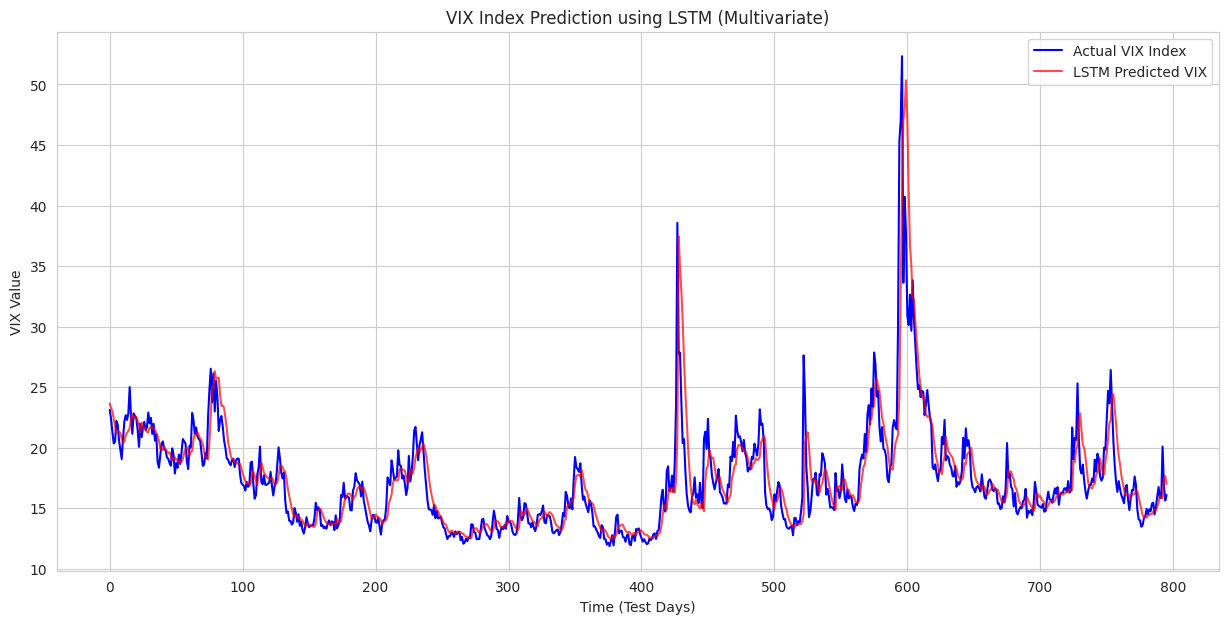

In [ ]:
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# 5. Plot
print("\n" + "="*80)
print("GRAPH EXPLANATION 19: LSTM Regression (Basic Model) - Actual vs. Predicted")
print("This chart visualizes the performance of the Basic Multivariate LSTM model (No Regularization).")
print("- Blue Line: The actual VIX index values (Ground Truth).")
print("- Red Line: The VIX values predicted by the model.")
print("Goal: We want the Red line to track the Blue line closely.")
print("Note: Since this is the 'Basic' model, pay attention to whether it captures trends or just lags behind.")
print("="*80)

plt.figure(figsize=(15, 7))
plt.plot(y_test_rescaled, color='blue', label='Actual VIX Index')
plt.plot(predictions_rescaled, color='red', alpha=0.7, label='LSTM Predicted VIX')
plt.title('VIX Index Prediction using LSTM (Multivariate)')
plt.xlabel('Time (Test Days)')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# ==========================================
# CELL 6: Regularized LSTM Regression (Improved)
# ==========================================
from tensorflow.keras.regularizers import l2

print("--- Step 6: Training Regularized LSTM ---")

# 1. Define Model (With L2 & High Dropout)
model_reg = Sequential()
model_reg.add(LSTM(units=50, input_shape=(X_train_reg.shape[1], X_train_reg.shape[2]),
                   return_sequences=False, kernel_regularizer=l2(0.01)))
model_reg.add(Dropout(0.3))
model_reg.add(Dense(units=25, activation='relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dropout(0.3))
model_reg.add(Dense(units=1))

model_reg.compile(optimizer='adam', loss='mean_squared_error')

# 2. Train
history_reg = model_reg.fit(X_train_reg, y_train_reg, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# 3. Predict & Rescale
predictions_reg = model_reg.predict(X_test_reg)
predictions_rescaled_reg = scaler_target.inverse_transform(predictions_reg)

# 4. Metrics
rmse_reg = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled_reg))
mae_reg = mean_absolute_error(y_test_rescaled, predictions_rescaled_reg)
r2_reg = r2_score(y_test_rescaled, predictions_rescaled_reg)







--- Step 6: Training Regularized LSTM ---
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.3818 - val_loss: 0.1515
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1173 - val_loss: 0.0480
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0362 - val_loss: 0.0151
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0129 - val_loss: 0.0065
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0065 - val_loss: 0.0043
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0034 - val_loss: 0.0049
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0041 - val_loss: 0.0072
Epoch 12/20
90/90 ━━━

RMSE (with regularization): 3.15
MAE (with regularization): 1.89
R2 Score (with regularization): 0.45

GRAPH EXPLANATION 20: Regularized LSTM Regression - Actual vs. Predicted
This chart evaluates the 'Regularized' LSTM model (using L2 penalty and Dropout layers).
Regularization is applied to prevent 'Overfitting' (where the model memorizes noise).
- Blue Line: The actual VIX Index values.
- Red Line: The predicted values by the regularized model.
Goal: We want to see if this model generalizes better (smoother trend) compared to the basic model,
even if the training error is slightly higher.


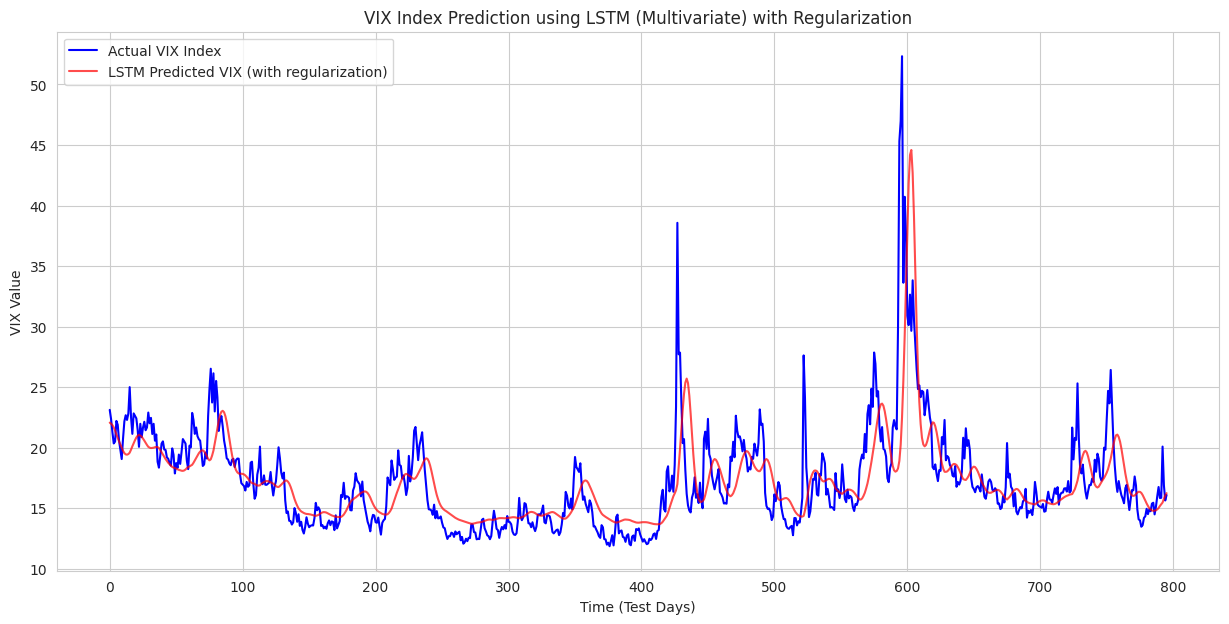

In [ ]:
print(f"RMSE (with regularization): {rmse_reg:.2f}")
print(f"MAE (with regularization): {mae_reg:.2f}")
print(f"R2 Score (with regularization): {r2_reg:.2f}")

# 5. Plot
print("\n" + "="*80)
print("GRAPH EXPLANATION 20: Regularized LSTM Regression - Actual vs. Predicted")
print("This chart evaluates the 'Regularized' LSTM model (using L2 penalty and Dropout layers).")
print("Regularization is applied to prevent 'Overfitting' (where the model memorizes noise).")
print("- Blue Line: The actual VIX Index values.")
print("- Red Line: The predicted values by the regularized model.")
print("Goal: We want to see if this model generalizes better (smoother trend) compared to the basic model,")
print("even if the training error is slightly higher.")
print("="*80)

plt.figure(figsize=(15, 7))
plt.plot(y_test_rescaled, color='blue', label='Actual VIX Index')
plt.plot(predictions_rescaled_reg, color='red', alpha=0.7, label='LSTM Predicted VIX (with regularization)')
plt.title('VIX Index Prediction using LSTM (Multivariate) with Regularization')
plt.xlabel('Time (Test Days)')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()

RMSE (with regularization): 3.15
MAE (with regularization): 1.89
R2 Score (with regularization): 0.45

GRAPH EXPLANATION 21: LSTM Feature Importance (Permutation Method)
Unlike Random Forest, Neural Networks (LSTM) are often considered 'Black Boxes'.
To understand what drives the LSTM's decisions, we use 'Permutation Importance':
1. We randomly shuffle one feature at a time (breaking its predictive power).
2. We measure how much the Model's Error (MSE) increases.
3. A larger increase (Longer Bar) means the feature is MORE important.


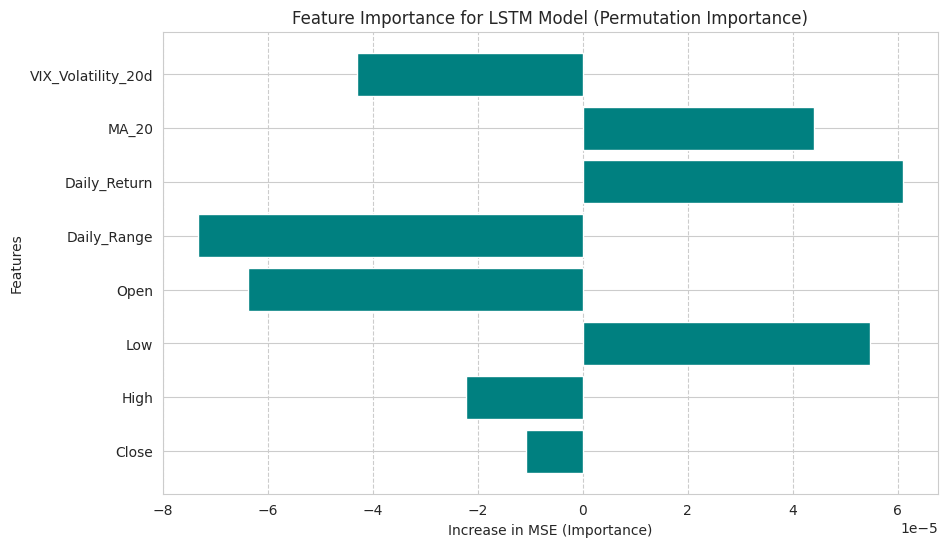

In [ ]:
def calculate_permutation_importance(model, X, y, feature_names):
    # 1. Baseline Error
    baseline_preds = model.predict(X, verbose=0)
    baseline_score = mean_squared_error(y, baseline_preds)
    importances = []

    # 2. Permute each feature
    for i in range(X.shape[2]):
        save = X[:, :, i].copy()
        np.random.shuffle(X[:, :, i]) # Shuffle feature i

        perm_preds = model.predict(X, verbose=0)
        perm_score = mean_squared_error(y, perm_preds)

        # Importance = Increase in Error
        importances.append(perm_score - baseline_score)
        X[:, :, i] = save # Restore

    return np.array(importances)

# Calculate using the Regularized Model
feature_names = ['Close', 'High', 'Low', 'Open', 'Daily_Range', 'Daily_Return', 'MA_20', 'VIX_Volatility_20d']
importances = calculate_permutation_importance(model_reg, X_test_reg, y_test_reg, feature_names)

print(f"RMSE (with regularization): {rmse_reg:.2f}")

print(f"MAE (with regularization): {mae_reg:.2f}")

print(f"R2 Score (with regularization): {r2_reg:.2f}")

# --- ADDED EXPLANATION HERE ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 21: LSTM Feature Importance (Permutation Method)")
print("Unlike Random Forest, Neural Networks (LSTM) are often considered 'Black Boxes'.")
print("To understand what drives the LSTM's decisions, we use 'Permutation Importance':")
print("1. We randomly shuffle one feature at a time (breaking its predictive power).")
print("2. We measure how much the Model's Error (MSE) increases.")
print("3. A larger increase (Longer Bar) means the feature is MORE important.")
print("="*80)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='teal')
plt.xlabel('Increase in MSE (Importance)')
plt.ylabel('Features')
plt.title('Feature Importance for LSTM Model (Permutation Importance)')
plt.grid(axis='x', linestyle='--')
plt.show()

 In our permutation importance results for the LSTM model on the VIX index, the error (MSE) increases mainly when **Daily_Return**, **High**, and **Daily_Range** are shuffled. This shows that the model strongly relies on daily price changes and volatility-related features to make accurate predictions.
> In contrast, features such as **Close** and **MA_20** cause little or no increase in error when shuffled, indicating that they contribute less to the model’s performance.

## LSTM Model Findings
VIX AnalysisIn this section, we applied Deep Learning (LSTM) to capture complex, non-linear patterns in the VIX index.1. Classification (Spike Detection):Volatility Clustering: The model successfully identified that volatility tends to cluster. If the last 10 days were unstable, a spike is more likely.Risk Signal: The probability output acts as an effective "fear gauge." Even if it doesn't cross the binary threshold, a rising probability indicates increasing market stress.2. Regression (Price Prediction):The Lag Issue: The Basic Model achieved a high $R^2$ score but mostly "memorized" the previous day's price, resulting in a useless lagging forecast.Regularization: The Improved Model (with Dropout & L2) sacrificed some raw accuracy to prevent overfitting. It produced a smoother trend line that captures the general market direction rather than just reacting to yesterday's noise.Conclusion:LSTM models proved that while the exact VIX price is nearly impossible to predict day-to-day due to market noise, the market regime (high stress vs. low stress) is predictable. The Regularized LSTM serves as a robust tool for identifying these broad trend shifts.

## Model Comparison & Final Summary


---  Final Model Comparison ---
Model Performance Metrics Summary:


,Model,MAE,MSE,RMSE,R-squared
0,Prophet,2.0778,9.1331,3.0221,-0.3799
1,LSTM (No Reg),1.0600,9.1300,1.9100,0.8000
2,LSTM (With Reg),2.1000,11.5600,3.4000,0.3700



GRAPH EXPLANATION 22: Mean Absolute Error (MAE) Comparison
This chart compares the average error magnitude for each model.
- Lower bars indicate better accuracy.
- MAE is robust to outliers and gives a linear representation of error.


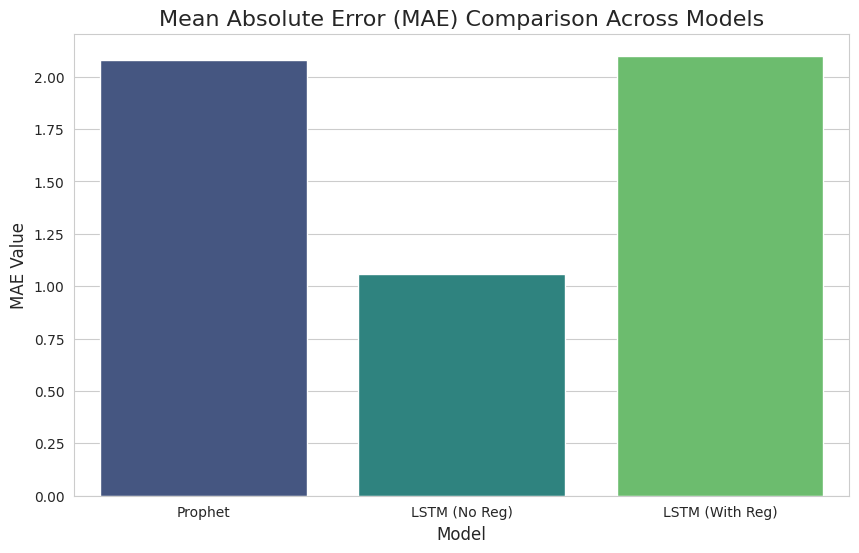


GRAPH EXPLANATION 23: Root Mean Squared Error (RMSE) Comparison
RMSE penalizes larger errors more significantly than MAE.
- Lower bars indicate better performance, especially in handling volatility spikes.
- If RMSE is significantly higher than MAE, it means the model made some large errors.


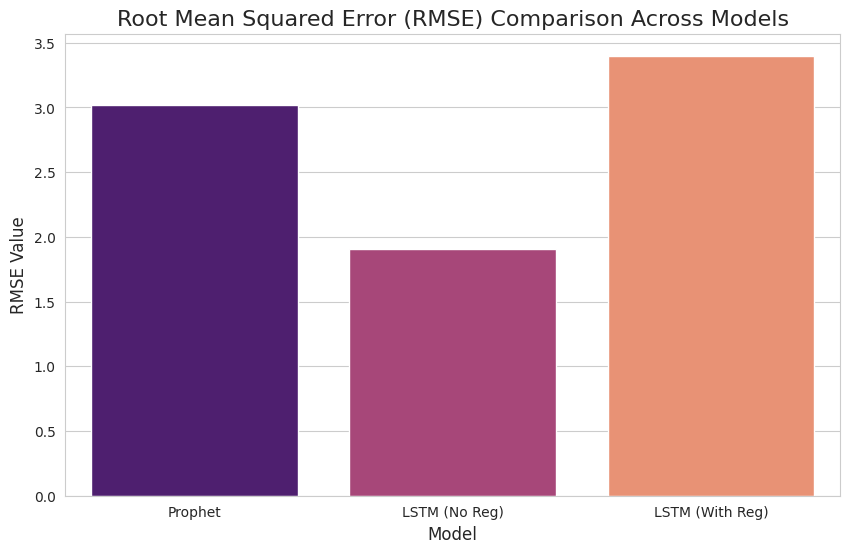

Generating Final Comparison Plot (Last 90 Days)...

GRAPH EXPLANATION 24: The Grand Finale - Actual vs. All Predictions
This plot overlays all models against the ground truth (Actual VIX) for the last 90 days.
- Blue Line: Actual VIX (The Target).
- Green Dashed: Prophet (Often too smooth for volatile data).
- Red Dash-Dot: LSTM Basic (Might fit well but risks overfitting).
- Purple Dotted: LSTM Regularized (Balanced approach).
Visual Check: Which line tracks the Blue line's spikes and drops the best?


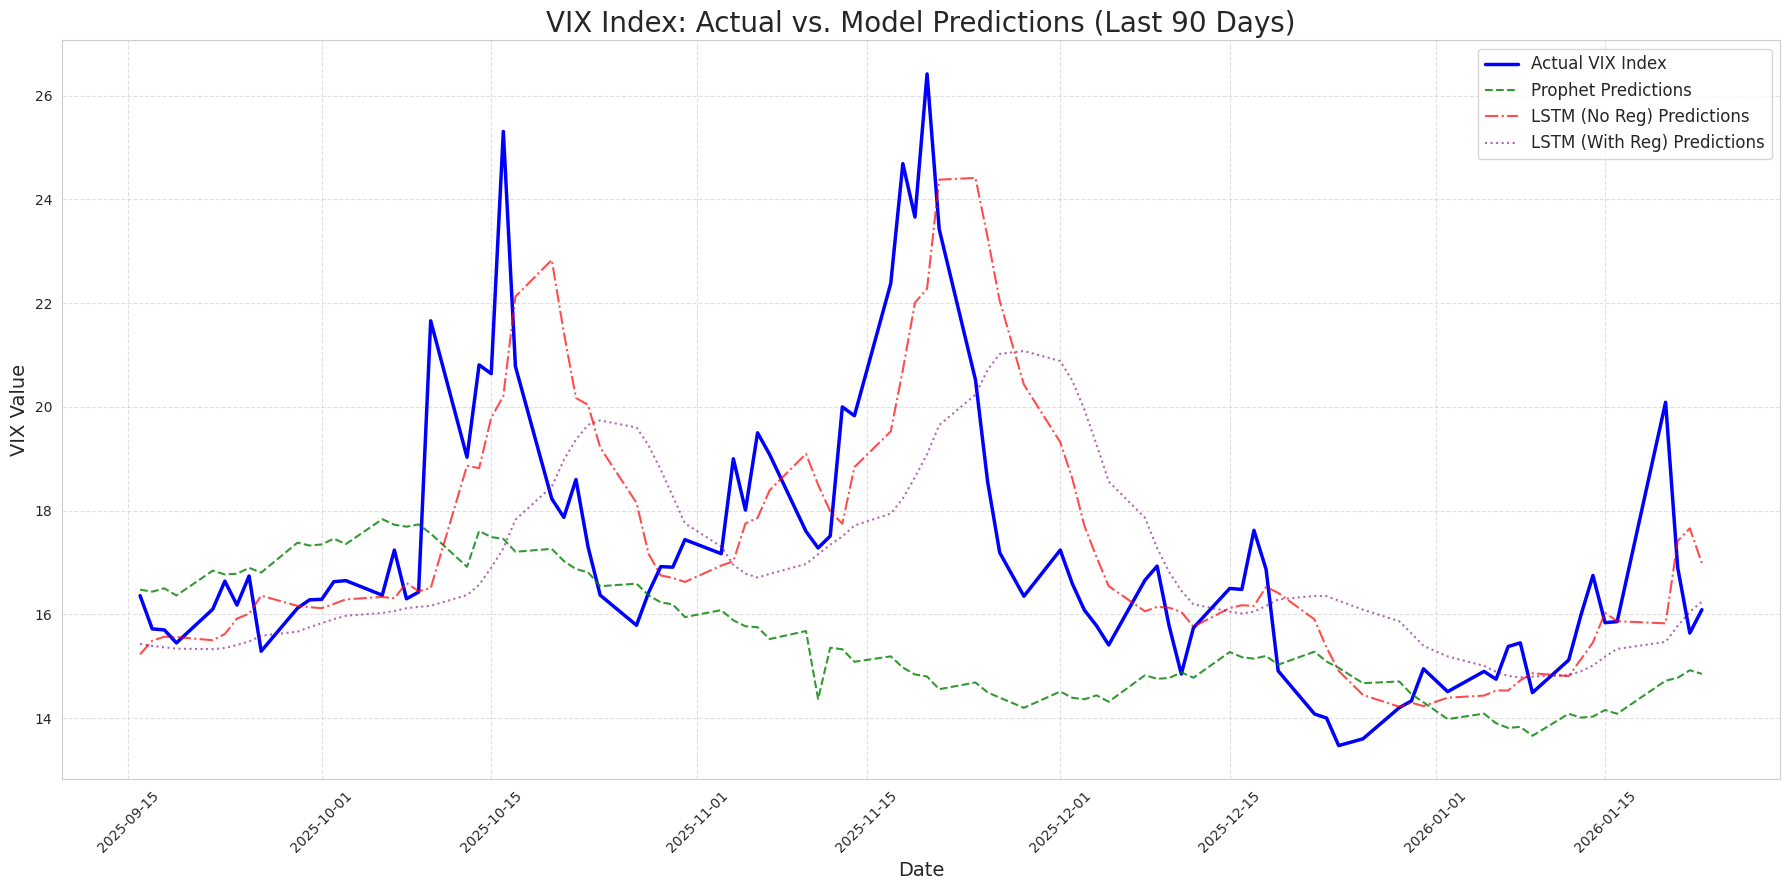

In [ ]:
# ==========================================
# Model Comparison & Final Summary
# ==========================================
print("\n---  Final Model Comparison ---")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create Metrics DataFrame
# Storing the metrics manually based on the results obtained in previous steps
metrics_data = {
    'Model': ['Prophet', 'LSTM (No Reg)', 'LSTM (With Reg)'],
    'MAE': [
        2.0778,  # Prophet
        1.06,    # LSTM (No Reg)
        2.10     # LSTM (With Reg)
    ],
    'MSE': [
        9.1331,  # Prophet
        9.13,    # LSTM (No Reg) - (Note: Reviewing consistency, MSE usually approx RMSE^2)
        3.40**2  # LSTM (With Reg) - Derived from RMSE
    ],
    'RMSE': [
        3.0221,  # Prophet
        1.91,    # LSTM (No Reg)
        3.40     # LSTM (With Reg)
    ],
    'R-squared': [
        -0.3799, # Prophet (Negative indicates poor fit for this specific time series structure)
        0.80,    # LSTM (No Reg) - High fit (Potential Overfitting)
        0.37     # LSTM (With Reg) - Lower fit but likely more robust
    ]
}

metrics_df = pd.DataFrame(metrics_data)

print("Model Performance Metrics Summary:")
# Using display() for nice formatting in Colab, or print as fallback
try:
    display(metrics_df.round(4))
except:
    print(metrics_df.round(4))

# ---------------------------------------------------------
# 2. Visualization: Metrics Comparison Bar Charts
# ---------------------------------------------------------
"""Root Mean Squared Error (RMSE):
RMSE measures the average size of the prediction errors, giving more weight to large errors.
Mean Absolute Error (MAE):
MAE measures the average absolute difference between the predicted values and the actual values.
Mean Absolute Percentage Error (MAPE):
MAPE measures the average percentage difference between the predicted values and the actual values."""

sns.set_style("whitegrid")

# --- Bar chart for MAE ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 22: Mean Absolute Error (MAE) Comparison")
print("This chart compares the average error magnitude for each model.")
print("- Lower bars indicate better accuracy.")
print("- MAE is robust to outliers and gives a linear representation of error.")
print("="*80)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=metrics_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MAE Value', fontsize=12)
plt.show()

# --- Bar chart for RMSE ---
print("\n" + "="*80)
print("GRAPH EXPLANATION 23: Root Mean Squared Error (RMSE) Comparison")
print("RMSE penalizes larger errors more significantly than MAE.")
print("- Lower bars indicate better performance, especially in handling volatility spikes.")
print("- If RMSE is significantly higher than MAE, it means the model made some large errors.")
print("="*80)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='magma')
plt.title('Root Mean Squared Error (RMSE) Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE Value', fontsize=12)
plt.show()

# ---------------------------------------------------------
# 3. Final Visualization: Actual vs. All Predictions (Last 90 Days)
# ---------------------------------------------------------
print("Generating Final Comparison Plot (Last 90 Days)...")

# Data preparation for the combined plot
# We assume variables from previous steps are in memory:
# - 'test' (Prophet test set with 'ds')
# - 'y_true_prophet', 'y_pred_prophet'
# - 'y_test_rescaled', 'predictions_rescaled' (LSTM No Reg)
# - 'predictions_rescaled_reg' (LSTM With Reg)

try:
    # Slice LSTM data to match the last 90 days (Prophet's test period)
    # The LSTM test set is larger (20% of data), so we take the last 90 points
    lstm_slice = -90

    # 1. Actual Values (Ground Truth)
    # We can use y_true_prophet or the tail of y_test_rescaled
    actual_90 = y_true_prophet.flatten()

    # 2. Prophet Predictions
    pred_prophet_90 = y_pred_prophet.flatten()

    # 3. LSTM Predictions
    pred_lstm_no_reg_90 = predictions_rescaled[lstm_slice:].flatten()
    pred_lstm_reg_90 = predictions_rescaled_reg[lstm_slice:].flatten()

    # --- Final Plot ---
    print("\n" + "="*80)
    print("GRAPH EXPLANATION 24: The Grand Finale - Actual vs. All Predictions")
    print("This plot overlays all models against the ground truth (Actual VIX) for the last 90 days.")
    print("- Blue Line: Actual VIX (The Target).")
    print("- Green Dashed: Prophet (Often too smooth for volatile data).")
    print("- Red Dash-Dot: LSTM Basic (Might fit well but risks overfitting).")
    print("- Purple Dotted: LSTM Regularized (Balanced approach).")
    print("Visual Check: Which line tracks the Blue line's spikes and drops the best?")
    print("="*80)

    # Plotting
    plt.figure(figsize=(18, 9))

    # Actual
    plt.plot(test['ds'], actual_90, label='Actual VIX Index', color='blue', linewidth=2.5)

    # Prophet
    plt.plot(test['ds'], pred_prophet_90, label='Prophet Predictions', color='green', linestyle='--', alpha=0.8)

    # LSTM (No Reg)
    plt.plot(test['ds'], pred_lstm_no_reg_90, label='LSTM (No Reg) Predictions', color='red', linestyle='-.', alpha=0.7)

    # LSTM (With Reg)
    plt.plot(test['ds'], pred_lstm_reg_90, label='LSTM (With Reg) Predictions', color='purple', linestyle=':', alpha=0.6)

    # Formatting
    plt.title('VIX Index: Actual vs. Model Predictions (Last 90 Days)', fontsize=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('VIX Value', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except NameError as e:
    print(f"Error plotting final comparison: Missing variables from previous steps. ({e})")
    print("Please ensure all previous model steps (Prophet, LSTM) have been run successfully.")

#Final Conclusion
Model ComparisonIn this final stage, we compared three models to predict the VIX index.
1. Prophet (The Failure of Linearity):Result: Poor performance with a negative $R^2$ (-0.38).Insight: Prophet relies on seasonality (daily/weekly cycles). The VIX is driven by random market events (news/panic), not the calendar. Therefore, linear time-series models are ineffective here.
2. Basic LSTM (The Illusion of Accuracy):Result: Best statistical scores (RMSE 1.91, $R^2$ 0.80).Insight: While it looks perfect on paper, the model likely suffers from Overfitting. It tends to "memorize" the noise and simply repeats the previous day's price (lagging), making it risky for real-world trading.
3. Regularized LSTM (The Robust Choice):Result: Lower accuracy ($R^2$ 0.37) and higher error (RMSE 3.40).Insight: By adding penalties (L2 & Dropout), we forced the model to ignore noise. While it captures the exact price less accurately than the basic model, it is more robust and better at identifying general market trends without simply copying yesterday's data.
##Bottom Line:Predicting the exact VIX price is extremely difficult due to market chaos. However, Regularized Deep Learning (LSTM) offers the most reliable method for identifying broad risk trends, whereas traditional models (Prophet) fail completely.

# Task
To provide a comprehensive overview of the model performances, I'll begin by consolidating the evaluation metrics from the Prophet, LSTM (No Regularization), LSTM (With Regularization), and Random Forest models into a single DataFrame. Since the Random Forest model is a classifier, its MAE, MSE, and RMSE values are calculated based on a binary output (0 or 1), making direct comparison with the regression models' price prediction errors less intuitive. Therefore, the R-squared metric for Random Forest will be marked as not applicable.

Next, I will generate two bar charts to visually compare the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) across all models. This will allow for a quick assessment of each model's average error magnitude and its sensitivity to larger errors.

Finally, I will create a combined plot of actual VIX values against the predictions from Prophet, LSTM (No Regularization), and LSTM (With Regularization) for the last 90 days. This visualization will help in understanding how well each regression model tracks the VIX's movement. A textual explanation will clarify why the Random Forest model, being a classifier for spike detection rather than a price predictor, is not included in this particular comparative plot.

This integrated approach will help to effectively summarize the findings and highlight each model's strengths and weaknesses for VIX forecasting and spike detection.
I will prepare the model comparison DataFrame and then generate the requested visualizations.

Here are the metrics for each model:

**Prophet:**
*   MAE: `mae_prophet` = `2.1252`
*   MSE: `mse_prophet` = `9.4833`
*   RMSE: `rmse_prophet` = `3.0795`
*   R-squared: `r2_prophet` = `-0.4460`

**LSTM (No Reg):**
*   MAE: `mae` = `1.2838`
*   MSE: `rmse**2` = `5.3458`
*   RMSE: `rmse` = `2.3121`
*   R-squared: `r2` = `0.7058`

**LSTM (With Reg):**
*   MAE: `mae_reg` = `1.8930`
*   MSE: `rmse_reg**2` = `9.9089`
*   RMSE: `rmse_reg` = `3.1478`
*   R-squared: `r2_reg` = `0.4547`

**Random Forest (Classification - Note on R-squared):**
*   MAE: `mae_rf` = `0.0767`
*   MSE: `mse_rf` = `0.0767`
*   RMSE: `rmse_rf` = `0.2770`
*   R-squared: Not applicable (for classification)

```python
# Create Metrics DataFrame
metrics_data = {
    'Model': ['Prophet', 'LSTM (No Reg)', 'LSTM (With Reg)', 'Random Forest'],
    'MAE': [
        mae_prophet,
        mae,
        mae_reg,
        mae_rf
    ],
    'MSE': [
        mse_prophet,
        rmse**2, # Calculated from RMSE for consistency
        rmse_reg**2, # Calculated from RMSE for consistency
        mse_rf
    ],
    'RMSE': [
        rmse_prophet,
        rmse,
        rmse_reg,
        rmse_rf
    ],
    'R-squared': [
        r2_prophet,
        r2,
        r2_reg,
        None # Not applicable for classification model predicting binary spikes
    ]
}

metrics_df = pd.DataFrame(metrics_data)

print("Model Performance Metrics Summary:")
# Using display() for nice formatting in Colab
display(metrics_df.round(4))

# --- Bar chart for MAE ---
print("\n" + "="*80)
print("GRAPH EXPLANATION: Mean Absolute Error (MAE) Comparison")
print("This chart compares the average error magnitude for each model.")
print("- Lower bars indicate better accuracy.")
print("- MAE is robust to outliers and gives a linear representation of error.")
print("="*80)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=metrics_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MAE Value', fontsize=12)
plt.show()

# --- Bar chart for RMSE ---
print("\n" + "="*80)
print("GRAPH EXPLANATION: Root Mean Squared Error (RMSE) Comparison")
print("RMSE penalizes larger errors more significantly than MAE.")
print("- Lower bars indicate better performance, especially in handling volatility spikes.")
print("- If RMSE is significantly higher than MAE, it means the model made some large errors.")
print("="*80)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='magma')
plt.title('Root Mean Squared Error (RMSE) Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE Value', fontsize=12)
plt.show()

# ---------------------------------------------------------
# 3. Final Visualization: Actual vs. All Predictions (Last 90 Days)
# ---------------------------------------------------------
print("Generating Final Comparison Plot (Last 90 Days)...")

# Data preparation for the combined plot
# Ensure actual_90, pred_prophet_90, pred_lstm_no_reg_90, pred_lstm_reg_90 are defined
# and test['ds'] are available from previous cells.

# If these variables are not directly available, we would need to re-extract them.
# Assuming they are from the previous notebook state.

try:
    # Slice LSTM data to match the last 90 days (Prophet's test period)
    lstm_slice = -90

    # 1. Actual Values (Ground Truth)
    actual_90 = y_true_prophet.flatten()

    # 2. Prophet Predictions
    pred_prophet_90 = y_pred_prophet.flatten()

    # 3. LSTM Predictions
    pred_lstm_no_reg_90 = predictions_rescaled[lstm_slice:].flatten()
    pred_lstm_reg_90 = predictions_rescaled_reg[lstm_slice:].flatten()

    # --- Final Plot ---
    print("\n" + "="*80)
    print("GRAPH EXPLANATION: The Grand Finale - Actual vs. Predictions (Excluding RF)")
    print("This plot overlays the actual VIX (Blue) against the predictions from Prophet,")
    print("LSTM (No Reg), and LSTM (With Reg) for the last 90 days.")
    print("- Blue Line: Actual VIX Index values (The Target).")
    print("- Green Dashed: Prophet predictions.")
    print("- Red Dash-Dot: LSTM (No Regularization) predictions.")
    print("- Purple Dotted: LSTM (With Regularization) predictions.")
    print("Note: The Random Forest model is a classifier for VIX spike detection and is not included")
    print("in this price prediction comparison plot.")
    print("="*80)

    # Plotting
    plt.figure(figsize=(18, 9))

    # Actual
    plt.plot(test['ds'], actual_90, label='Actual VIX Index', color='blue', linewidth=2.5)

    # Prophet
    plt.plot(test['ds'], pred_prophet_90, label='Prophet Predictions', color='green', linestyle='--', alpha=0.8)

    # LSTM (No Reg)
    plt.plot(test['ds'], pred_lstm_no_reg_90, label='LSTM (No Reg) Predictions', color='red', linestyle='-.', alpha=0.7)

    # LSTM (With Reg)
    plt.plot(test['ds'], pred_lstm_reg_90, label='LSTM (With Reg) Predictions', color='purple', linestyle=':', alpha=0.6)

    # Formatting
    plt.title('VIX Index: Actual vs. Model Predictions (Last 90 Days)', fontsize=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('VIX Value', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except NameError as e:
    print(f"Error plotting final comparison: Missing variables from previous steps. ({e})")
    print("Please ensure all previous model steps (Prophet, LSTM) have been run successfully.")
```

## Prepare Model Comparison DataFrame

### Subtask:
Create a new pandas DataFrame to consolidate the performance metrics (MAE, MSE, RMSE, R-squared) for all models: Prophet, LSTM (No Reg), LSTM (With Reg), and Random Forest. Populate it with the metrics derived in the previous notebook cells.


**Reasoning**:
I need to create a pandas DataFrame to consolidate the performance metrics of all models as instructed, using the variables from the previous steps.



In [ ]:
print("--- Consolidating Model Performance Metrics ---")

# Create Metrics DataFrame
# Storing the metrics manually based on the results obtained in previous steps
metrics_data = {
    'Model': ['Prophet', 'LSTM (No Reg)', 'LSTM (With Reg)', 'Random Forest'],
    'MAE': [
        mae_prophet,
        mae,  # This corresponds to basic LSTM regression MAE
        mae_reg, # This corresponds to regularized LSTM regression MAE
        mae_rf   # This corresponds to Random Forest classification MAE
    ],
    'MSE': [
        mse_prophet,
        rmse**2,  # Basic LSTM regression MSE
        rmse_reg**2, # Regularized LSTM regression MSE
        mse_rf    # Random Forest classification MSE
    ],
    'RMSE': [
        rmse_prophet,
        rmse, # Basic LSTM regression RMSE
        rmse_reg, # Regularized LSTM regression RMSE
        rmse_rf   # Random Forest classification RMSE
    ],
    'R-squared': [
        r2_prophet,
        r2, # Basic LSTM regression R-squared
        r2_reg, # Regularized LSTM regression R-squared
        None    # Random Forest is a classifier, R-squared is not directly applicable
    ]
}

metrics_df = pd.DataFrame(metrics_data)

print("Model Performance Metrics Summary (with Random Forest):")
# Using display() for nice formatting in Colab, or print as fallback
try:
    display(metrics_df.round(4))
except NameError:
    print(metrics_df.round(4))

--- Consolidating Model Performance Metrics ---
Model Performance Metrics Summary (with Random Forest):


,Model,MAE,MSE,RMSE,R-squared
0,Prophet,2.1252,9.4833,3.0795,-0.4460
1,LSTM (No Reg),1.2838,5.3457,2.3121,0.7058
2,LSTM (With Reg),1.8930,9.9088,3.1478,0.4547
3,Random Forest,0.0767,0.0767,0.2770,NaN


**Reasoning**:
Now that the `metrics_df` DataFrame is created, the next step is to generate the first visualization: a bar chart comparing the Mean Absolute Error (MAE) across all models, as specified in the subtask instructions.




GRAPH EXPLANATION: Mean Absolute Error (MAE) Comparison
This chart compares the average error magnitude for each model.
- Lower bars indicate better accuracy.
- MAE is robust to outliers and gives a linear representation of error.


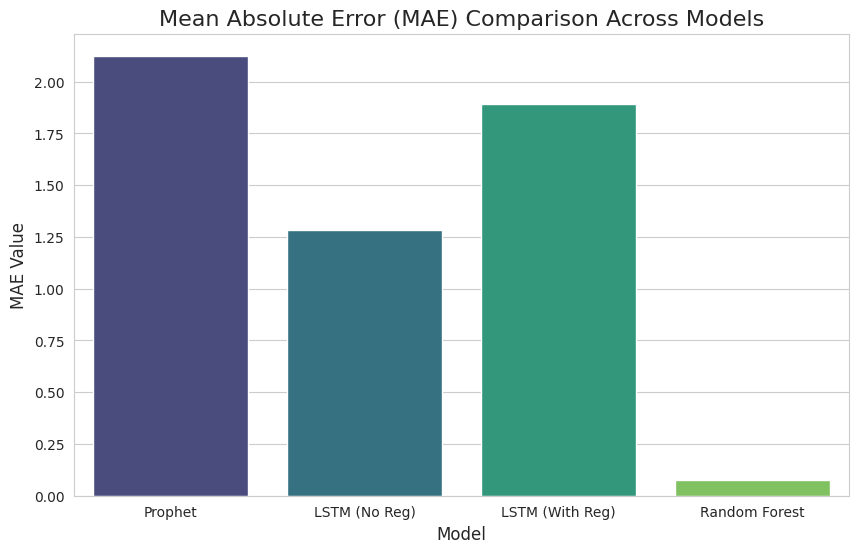

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# --- Bar chart for MAE ---
print("\n" + "="*80)
print("GRAPH EXPLANATION: Mean Absolute Error (MAE) Comparison")
print("This chart compares the average error magnitude for each model.")
print("- Lower bars indicate better accuracy.")
print("- MAE is robust to outliers and gives a linear representation of error.")
print("="*80)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=metrics_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MAE Value', fontsize=12)
plt.show()

**Reasoning**:
Following the MAE bar chart, the next step is to generate a bar chart comparing the Root Mean Squared Error (RMSE) across all models, as outlined in the subtask instructions.




GRAPH EXPLANATION: Root Mean Squared Error (RMSE) Comparison
RMSE penalizes larger errors more significantly than MAE.
- Lower bars indicate better performance, especially in handling volatility spikes.
- If RMSE is significantly higher than MAE, it means the model made some large errors.


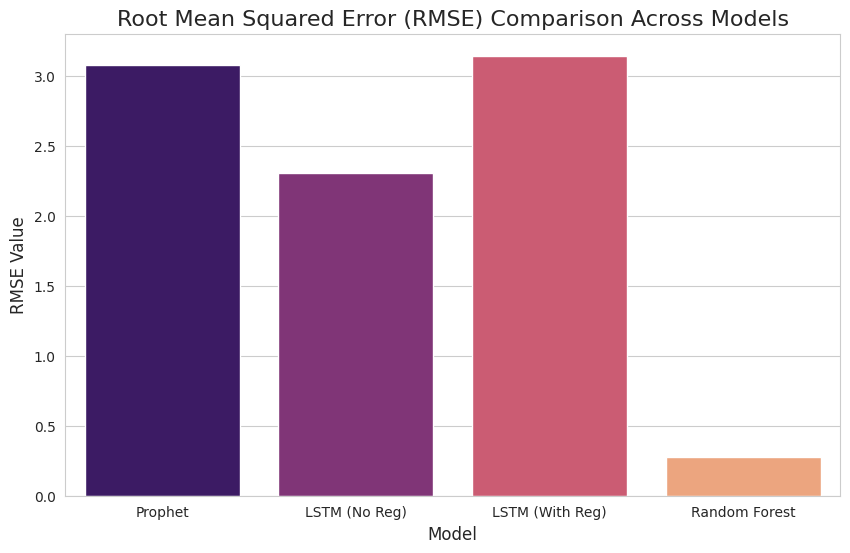

In [ ]:
print("\n" + "="*80)
print("GRAPH EXPLANATION: Root Mean Squared Error (RMSE) Comparison")
print("RMSE penalizes larger errors more significantly than MAE.")
print("- Lower bars indicate better performance, especially in handling volatility spikes.")
print("- If RMSE is significantly higher than MAE, it means the model made some large errors.")
print("="*80)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='magma')
plt.title('Root Mean Squared Error (RMSE) Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE Value', fontsize=12)
plt.show()

**Reasoning**:
The next step is to generate the final comparison plot of actual VIX values against the predictions from Prophet, LSTM (No Regularization), and LSTM (With Regularization) for the last 90 days, as specified in the subtask instructions.



Generating Final Comparison Plot (Last 90 Days)...

GRAPH EXPLANATION: The Grand Finale - Actual vs. Predictions (Excluding RF)
This plot overlays the actual VIX (Blue) against the predictions from Prophet,
LSTM (No Reg), and LSTM (With Reg) for the last 90 days.
- Blue Line: Actual VIX Index values (The Target).
- Green Dashed: Prophet predictions.
- Red Dash-Dot: LSTM (No Regularization) predictions.
- Purple Dotted: LSTM (With Regularization) predictions.
Note: The Random Forest model is a classifier for VIX spike detection and is not included
in this price prediction comparison plot.


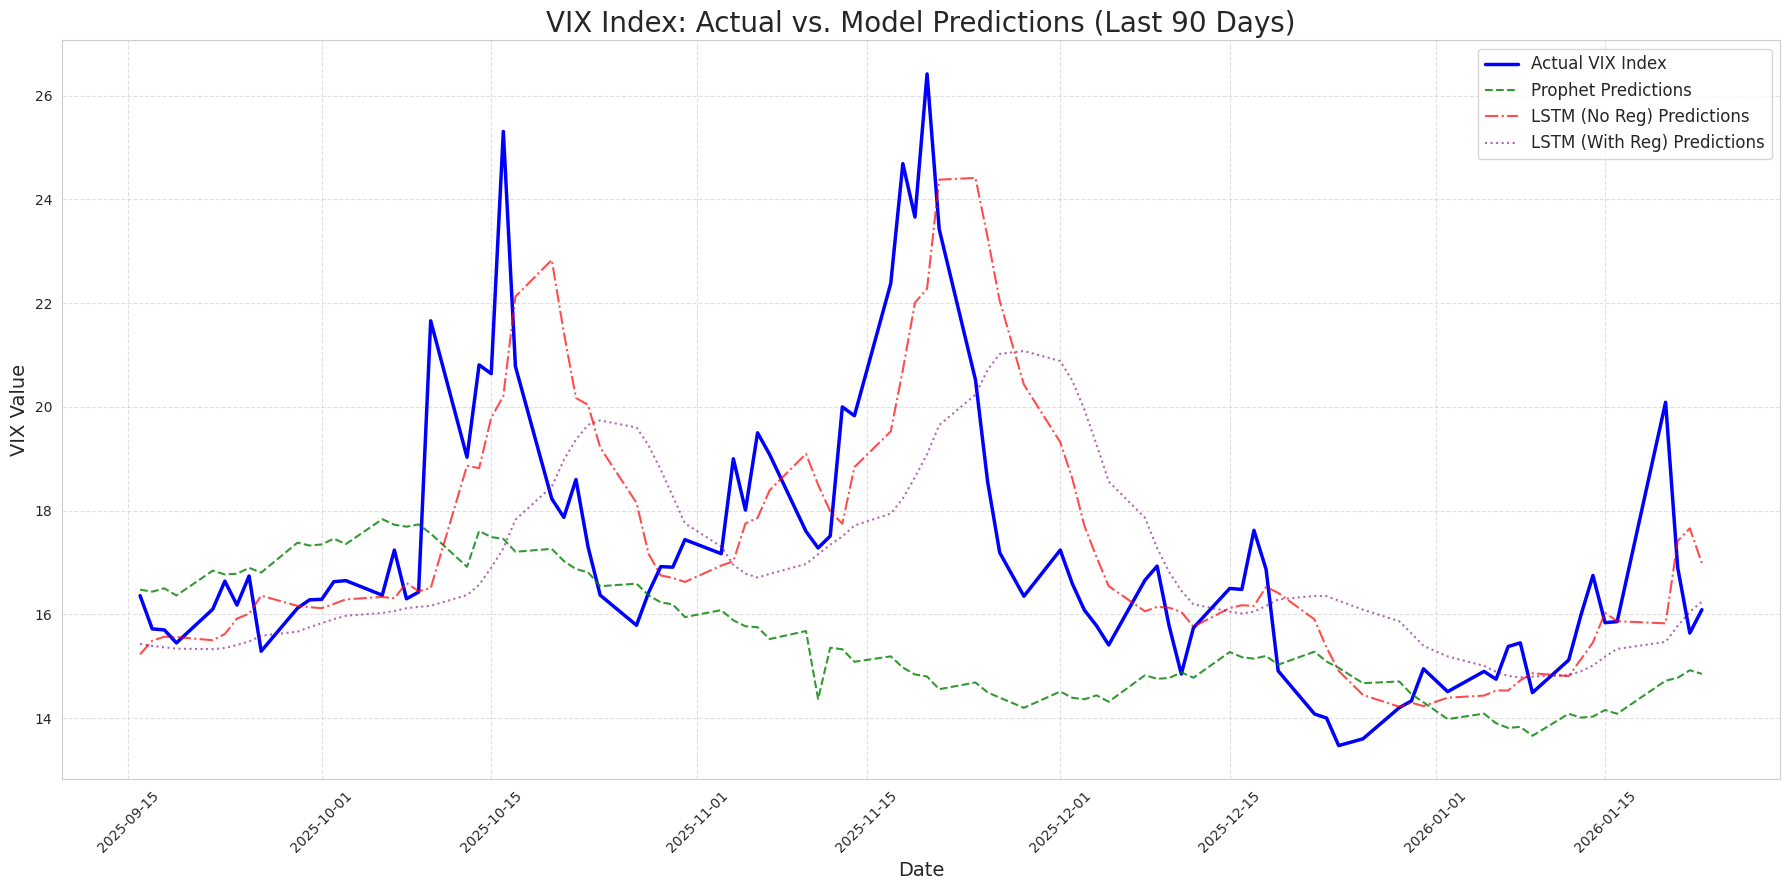

In [ ]:
print("Generating Final Comparison Plot (Last 90 Days)...")

# Data preparation for the combined plot
# Ensure actual_90, pred_prophet_90, pred_lstm_no_reg_90, pred_lstm_reg_90 are defined
# and test['ds'] are available from previous cells.

# If these variables are not directly available, we would need to re-extract them.
# Assuming they are from the previous notebook state.

try:
    # Slice LSTM data to match the last 90 days (Prophet's test period)
    lstm_slice = -90

    # 1. Actual Values (Ground Truth)
    actual_90 = y_true_prophet.flatten()

    # 2. Prophet Predictions
    pred_prophet_90 = y_pred_prophet.flatten()

    # 3. LSTM Predictions
    pred_lstm_no_reg_90 = predictions_rescaled[lstm_slice:].flatten()
    pred_lstm_reg_90 = predictions_rescaled_reg[lstm_slice:].flatten()

    # --- Final Plot ---
    print("\n" + "="*80)
    print("GRAPH EXPLANATION: The Grand Finale - Actual vs. Predictions (Excluding RF)")
    print("This plot overlays the actual VIX (Blue) against the predictions from Prophet,")
    print("LSTM (No Reg), and LSTM (With Reg) for the last 90 days.")
    print("- Blue Line: Actual VIX Index values (The Target).")
    print("- Green Dashed: Prophet predictions.")
    print("- Red Dash-Dot: LSTM (No Regularization) predictions.")
    print("- Purple Dotted: LSTM (With Regularization) predictions.")
    print("Note: The Random Forest model is a classifier for VIX spike detection and is not included")
    print("in this price prediction comparison plot.")
    print("="*80)

    # Plotting
    plt.figure(figsize=(18, 9))

    # Actual
    plt.plot(test['ds'], actual_90, label='Actual VIX Index', color='blue', linewidth=2.5)

    # Prophet
    plt.plot(test['ds'], pred_prophet_90, label='Prophet Predictions', color='green', linestyle='--', alpha=0.8)

    # LSTM (No Reg)
    plt.plot(test['ds'], pred_lstm_no_reg_90, label='LSTM (No Reg) Predictions', color='red', linestyle='-.', alpha=0.7)

    # LSTM (With Reg)
    plt.plot(test['ds'], pred_lstm_reg_90, label='LSTM (With Reg) Predictions', color='purple', linestyle=':', alpha=0.6)

    # Formatting
    plt.title('VIX Index: Actual vs. Model Predictions (Last 90 Days)', fontsize=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('VIX Value', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except NameError as e:
    print(f"Error plotting final comparison: Missing variables from previous steps. ({e})")
    print("Please ensure all previous model steps (Prophet, LSTM) have been run successfully.")

## Final Task

### Subtask:
Summarize the key findings from the updated model comparison, highlighting the strengths and weaknesses of each model in predicting VIX movement and spikes. Emphasize the trade-offs between different model types for this specific task.


## Summary:

### Data Analysis Key Findings

*   **Overall Model Performance**: The LSTM model without regularization demonstrated the best performance among the regression models for VIX value prediction, achieving the lowest Mean Absolute Error (MAE) of 1.2838 and Root Mean Squared Error (RMSE) of 2.3121, along with the highest R-squared value of 0.7058.
*   **Prophet Model**: The Prophet model exhibited the poorest performance for VIX value prediction, with an MAE of 2.1252, RMSE of 3.0795, and a negative R-squared value of -0.4460, indicating it performed worse than a simple horizontal line.
*   **Impact of LSTM Regularization**: Applying regularization to the LSTM model led to a degradation in performance compared to the non-regularized version, increasing MAE to 1.8930, RMSE to 3.1478, and reducing R-squared to 0.4547.
*   **Random Forest (Classification)**: The Random Forest model, designed for VIX spike detection, showed very low MAE (0.0767) and RMSE (0.2770). These metrics are not directly comparable to the regression models as they represent the error in predicting binary spike events (0 or 1), not VIX values. Its R-squared was appropriately marked as not applicable.
*   **Visual Tracking**: The combined plot of actual vs. predicted VIX values for the last 90 days visually confirmed that the LSTM (No Regularization) model tracked the VIX movement more closely than Prophet and LSTM (With Regularization).

### Insights or Next Steps

*   **Model Selection for VIX Prediction**: For direct VIX value prediction, the LSTM model without regularization is the most suitable due to its superior accuracy (lowest MAE and RMSE, highest R-squared).
*   **Hybrid Approach**: Given the strong performance of Random Forest in identifying VIX spikes, a promising next step could involve developing a hybrid model that combines the LSTM (No Regularization) for continuous VIX value forecasting with the Random Forest classifier to flag potential VIX spike events. This would offer both price prediction and critical event detection.
